# Plots for GSA

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

## Heterogeneous - No Network

                 Parameter        S1   S1_conf        ST   ST_conf  \
0            TP Percentage  0.308919  0.127481  0.642548  0.138459   
1   Satisfaction Threshold  0.056837  0.070383  0.186434  0.075530   
2    Uncertainty Threshold  0.230511  0.127052  0.511715  0.122445   
3  Min Increase Percentage  0.001147  0.002011  0.000174  0.000104   
4  Max Increase Percentage -0.000069  0.001720  0.000086  0.000092   

         Measure  
0  Adoption Rate  
1  Adoption Rate  
2  Adoption Rate  
3  Adoption Rate  
4  Adoption Rate  
                 Parameter        Measure Statistic     Value
0            TP Percentage  Adoption Rate        S1  0.308919
1   Satisfaction Threshold  Adoption Rate        S1  0.056837
2    Uncertainty Threshold  Adoption Rate        S1  0.230511
3  Min Increase Percentage  Adoption Rate        S1  0.001147
4  Max Increase Percentage  Adoption Rate        S1 -0.000069


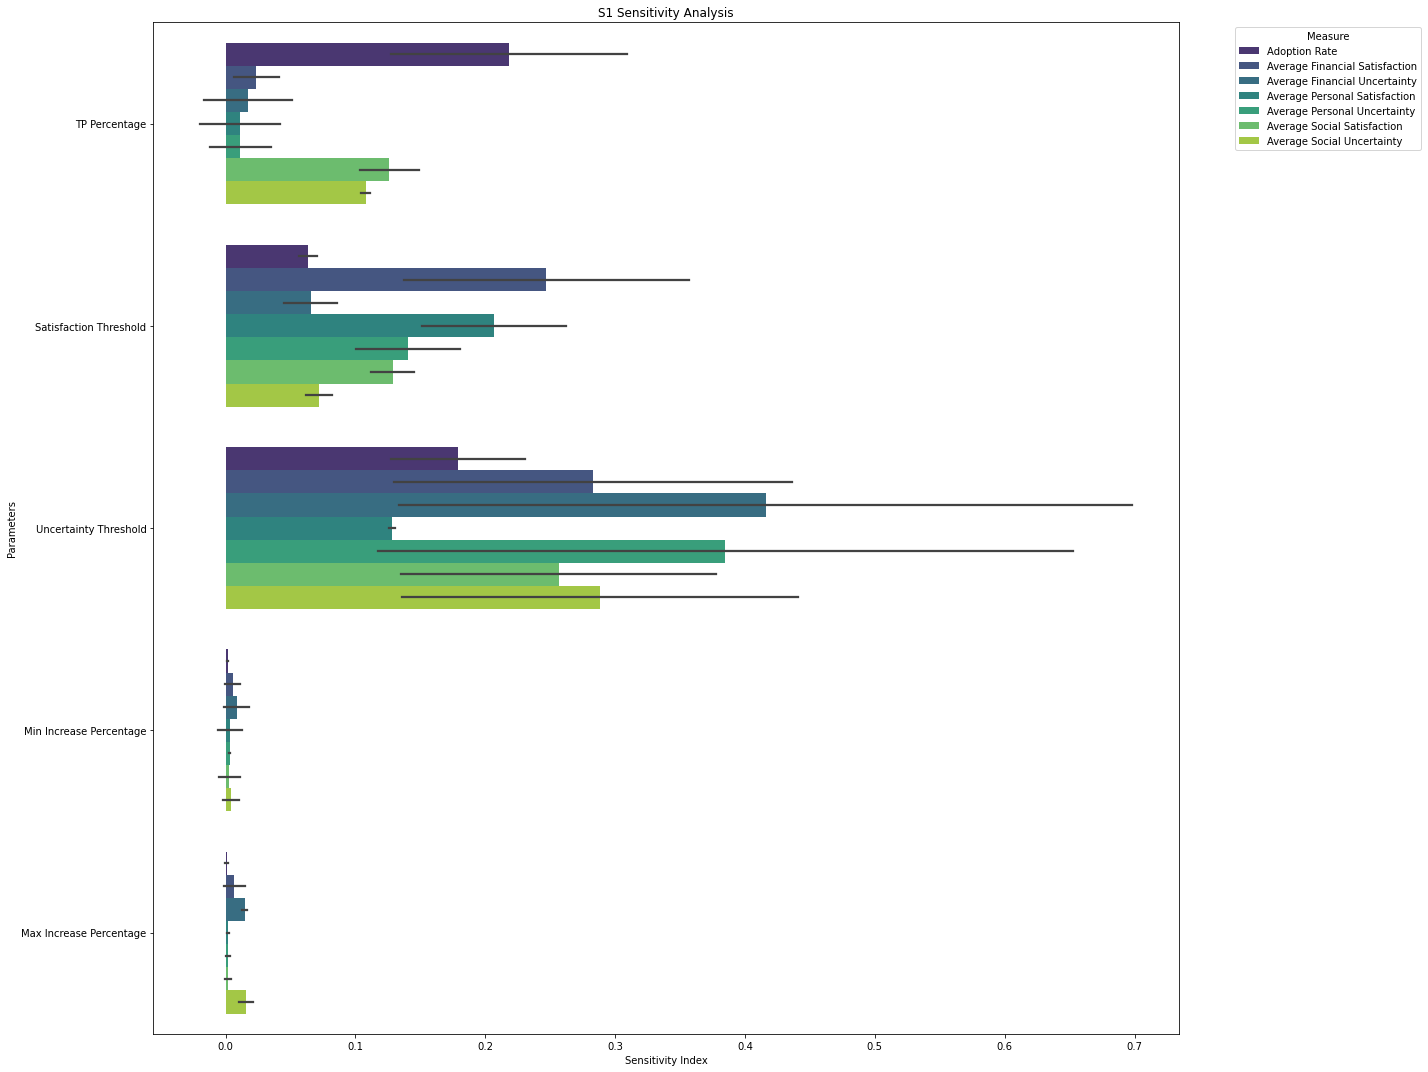

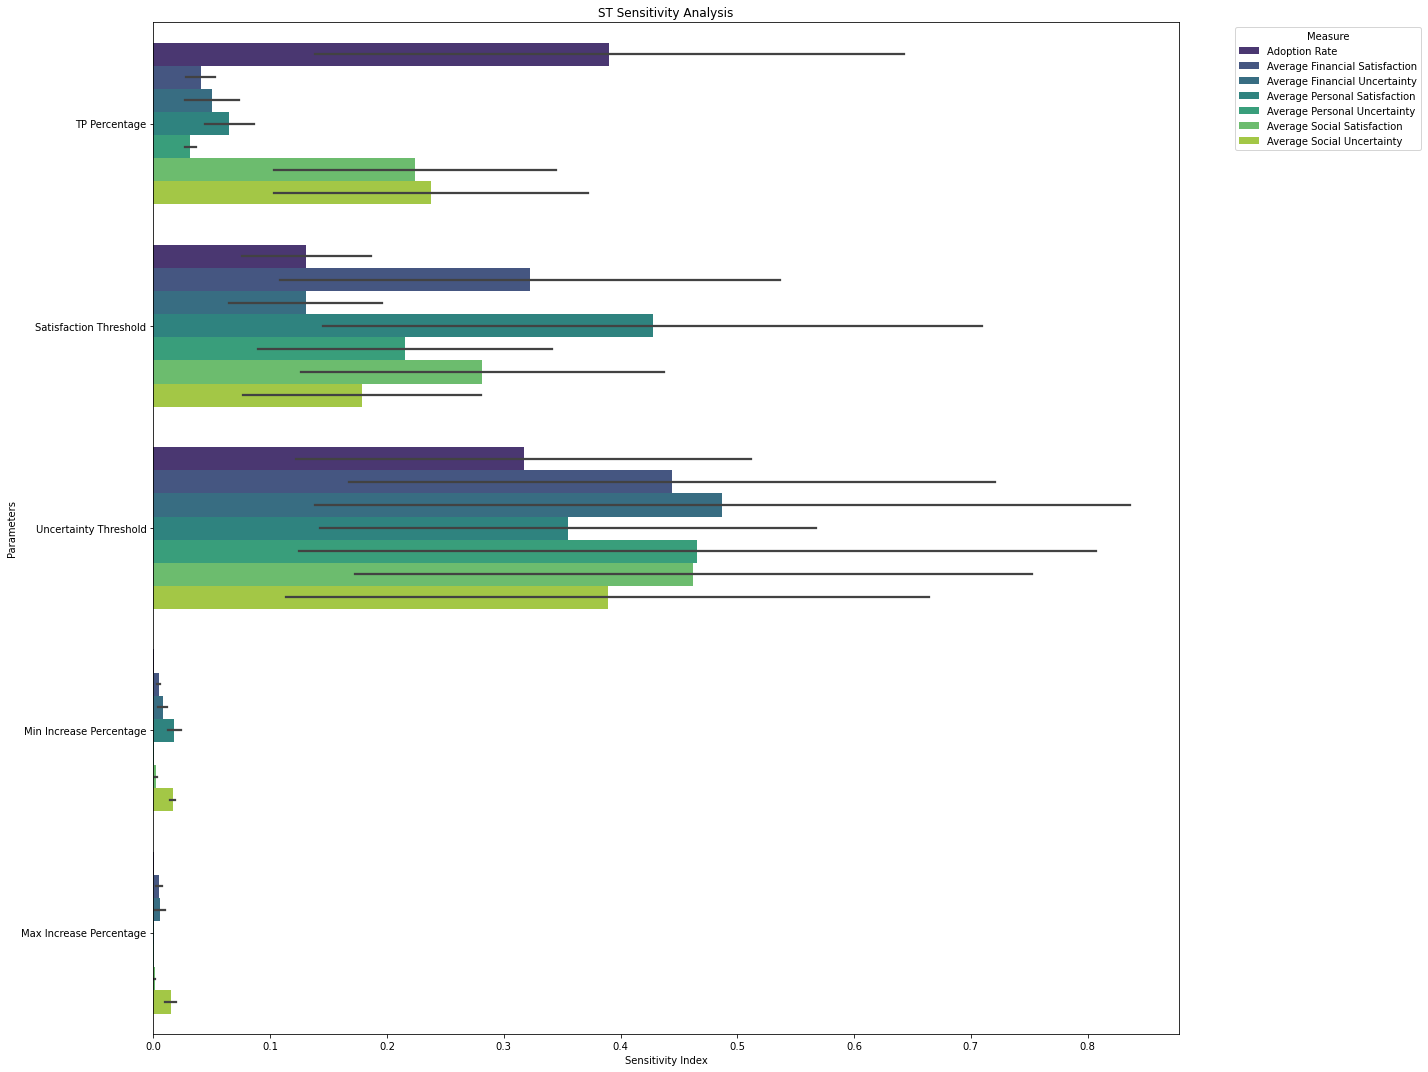

In [184]:

# File paths
heterogeneous_file_paths = [
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Adoption Rate.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_F_Satisfaction.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_F_Uncertainty.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_P_Satisfaction.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_P_Uncertainty.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_S_Satisfaction.csv",
    "/Applications/UNI/ThesisNew/Heterogeneous - no nework/New Data/Heterogeneous Results/sensitivity_analysis_Avg_S_Uncertainty.csv"
]
# Descriptive names mapping
sources_names = {
    "sensitivity_analysis_Adoption Rate.csv": "Adoption Rate",
    "sensitivity_analysis_Avg_F_Satisfaction.csv": "Average Financial Satisfaction",
    "sensitivity_analysis_Avg_F_Uncertainty.csv": "Average Financial Uncertainty",
    "sensitivity_analysis_Avg_P_Satisfaction.csv": "Average Personal Satisfaction",
    "sensitivity_analysis_Avg_P_Uncertainty.csv": "Average Personal Uncertainty",
    "sensitivity_analysis_Avg_S_Satisfaction.csv": "Average Social Satisfaction",
    "sensitivity_analysis_Avg_S_Uncertainty.csv": "Average Social Uncertainty"
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage"
}

# Load the data into DataFrames
heterogeneous_data_frames = [pd.read_csv(file) for file in heterogeneous_file_paths]

# Rename 'Unnamed: 0' column to 'Parameter' and apply parameter names mapping
for df in heterogeneous_data_frames:
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'Parameter'}, inplace=True)
    df['Parameter'] = df['Parameter'].map(parameter_names)


# Combine data into a single DataFrame with an additional column indicating the source file
heterogeneous_combined_df = pd.concat(
    [df.assign(Measure=sources_names[file.split('/')[-1]]) for df, file in zip(heterogeneous_data_frames, heterogeneous_file_paths)]
)
print(heterogeneous_combined_df.head())  # Check the combined DataFrame structure


# Melt the DataFrame for seaborn plotting
heterogeneous_melted_df = pd.melt(heterogeneous_combined_df, id_vars=['Parameter', 'Measure'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')

print(heterogeneous_melted_df.head())  # Check the melted DataFrame structure

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST)
def plot_sensitivity(df, statistic):
    plt.figure(figsize=(20, 15))
    sns.barplot(data=df[df['Statistic'].str.startswith(statistic)], 
                x='Value', y='Parameter', hue='Measure', orient='h', palette='viridis')
    plt.title(f'{statistic} Sensitivity Analysis')
    plt.xlabel('Sensitivity Index')
    plt.ylabel('Parameters')
    plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage: plot sensitivity analysis for S1
plot_sensitivity(heterogeneous_melted_df, 'S1')

# Example usage: plot sensitivity analysis for ST
plot_sensitivity(heterogeneous_melted_df, 'ST')


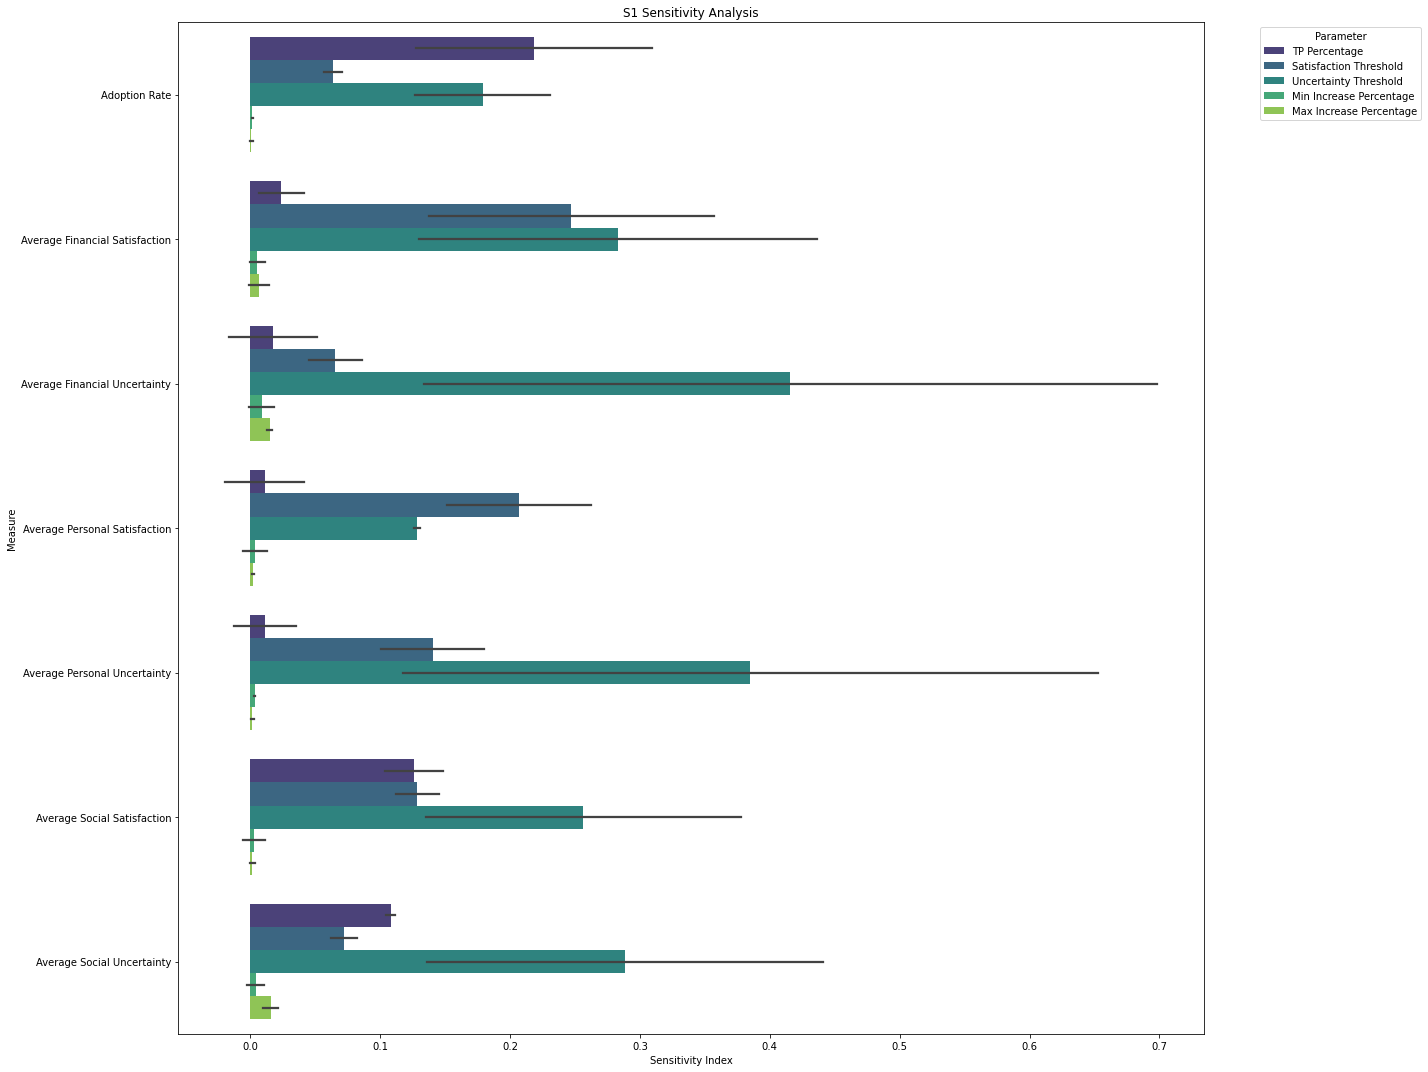

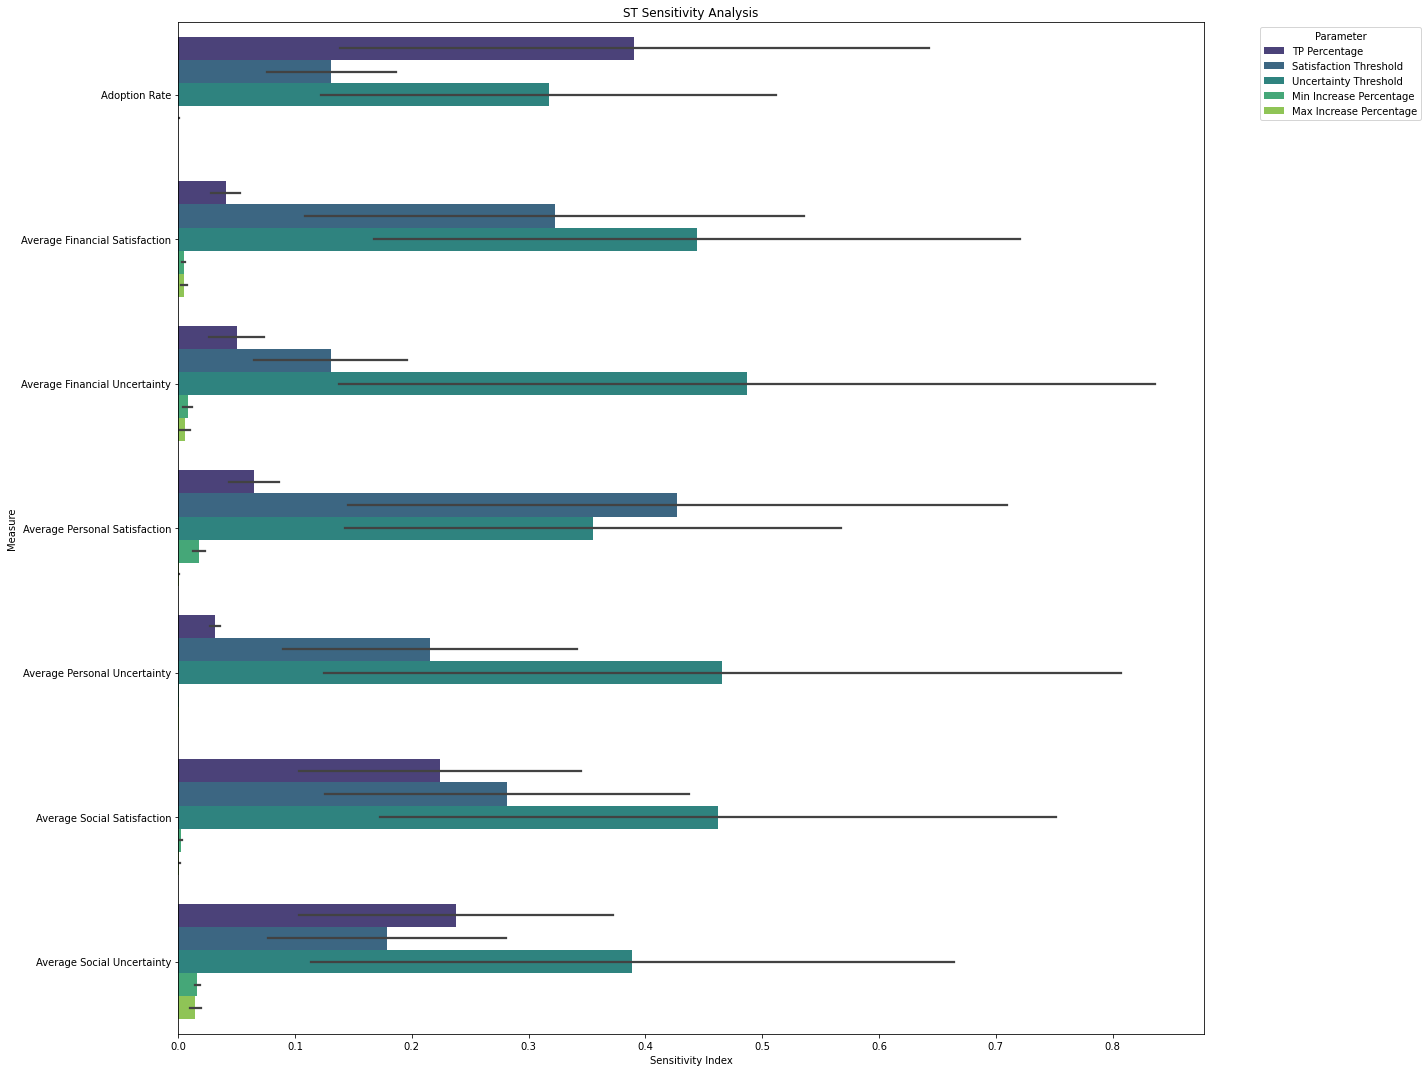

In [29]:
# Function to plot Sensitivity Analysis for a given statistic (S1 or ST), grouped by Source
def plot_sensitivity_by_source(df, statistic):
    plt.figure(figsize=(20, 15))
    sns.barplot(data=df[df['Statistic'].str.startswith(statistic)], 
                x='Value', y='Measure', hue='Parameter', orient='h', palette='viridis')
    plt.title(f'{statistic} Sensitivity Analysis')
    plt.xlabel('Sensitivity Index')
    plt.ylabel('Measure')
    plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage: plot sensitivity analysis for S1 grouped by Source
plot_sensitivity_by_source(heterogeneous_melted_df, 'S1')

# Example usage: plot sensitivity analysis for ST grouped by Source
plot_sensitivity_by_source(heterogeneous_melted_df, 'ST')

In [41]:
save_dir = "/Applications/UNI/ThesisNew/Plots/Heterogeneous plots"
os.makedirs(save_dir, exist_ok=True)

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) and save without titles
def plot_sensitivity_by_measure(df, statistic):
    measures = df['Measure'].unique()
    for measure in measures:
        plt.figure(figsize=(7, 4))
        subset_df = df[(df['Measure'] == measure) & (df['Statistic'].str.startswith(statistic))]
        
        # Plot dots
        sns.stripplot(data=subset_df[subset_df['Statistic'] == statistic], 
                      x='Value', y='Parameter', hue='Measure', palette='viridis', jitter=False, size=8)
        
        # Add error bars
        main_data = subset_df[subset_df['Statistic'] == statistic]
        conf_data = subset_df[subset_df['Statistic'] == f'{statistic}_conf']
        for idx, row in main_data.iterrows():
            plt.errorbar(x=row['Value'], y=row['Parameter'], 
                         xerr=conf_data[conf_data['Parameter'] == row['Parameter']]['Value'].values, 
                         fmt='o', color='darkgreen', elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Parameters')
        plt.legend(title='Measure', bbox_to_anchor=(1, 0), loc='lower right')

        plt.grid(True)
        plt.tight_layout()

        # Save the plot
        plt.savefig(os.path.join(save_dir, f"heterogeneous_plot_{statistic}_{measure.replace(' ', '_')}.png"))
        plt.close()

# Example usage: plot sensitivity analysis for S1 for each measure
plot_sensitivity_by_measure(heterogeneous_melted_df, 'S1')

# Example usage: plot sensitivity analysis for ST for each measure
plot_sensitivity_by_measure(heterogeneous_melted_df, 'ST')

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_41503/3535628645.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(os.path.join(save_dir, f"heterogeneous_plot_{statistic}_{measure.replace(' ', '_')}.png"))
/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_41503/3535628645.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(os.path.join(save_dir, f"heterogeneous_plot_{statistic}_{measure.replace(' ', '_')}.png"))
/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_41503/3535628645.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases late

In [188]:


# Function to categorize influence
def categorize_influence(st_value):
    if st_value > 0.6:
        return 'High influence'
    elif 0.2 <= st_value <= 0.6:
        return 'Moderate influence'
    elif 0 <= st_value < 0.2:
        return 'Negligible influence'
    else:
        return 'Other'  # To catch any other values, if necessary

# Apply the categorization
heterogeneous_combined_df['Influence'] = heterogeneous_combined_df['ST'].apply(categorize_influence)

# Initialize a list to collect the data for the new DataFrame
data = []

# Group by Network and Measure, then collect the parameter names based on influence category
grouped = heterogeneous_combined_df.groupby(['Measure'])
for (measure), group in grouped:
    high_influence_params = group[group['Influence'] == 'High influence']['Parameter'].tolist()
    moderate_influence_params = group[group['Influence'] == 'Moderate influence']['Parameter'].tolist()
    negligible_influence_params = group[group['Influence'] == 'Negligible influence']['Parameter'].tolist()
    
    # Join the parameter names into a single string for each category
    high_influence_str = ', '.join(high_influence_params)
    moderate_influence_str = ', '.join(moderate_influence_params)
    negligible_influence_str = ', '.join(negligible_influence_params)
    
    data.append([measure, high_influence_str, moderate_influence_str, negligible_influence_str])

# Create the new DataFrame
influence_df = pd.DataFrame(data, columns=['Measure', 'High influence', 'Moderate influence', 'Negligible influence'])

# Save to Excel
influence_df.to_excel('heterogeneous_network_influence_summary.xlsx', index=False)


## No Homophily Dynamic Network

In [62]:
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}
sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

In [63]:
# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into DataFrames
network_data_frames = {}
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        network_data_frames[network] = combined_df

# Display the DataFrames to verify structure
for network, df in network_data_frames.items():
    print(f"Data for {network}:")
    print(df.head(20))


Data for Barabasi-Albert:
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
5  -0.024590  0.163561  0.066617  0.073316                        m   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
11  0.012813  0.153872  0.057256  0.051346                        m   
12  0.071311  0.313820  0.087103  0.115554         

Plotting for Barabasi-Albert:


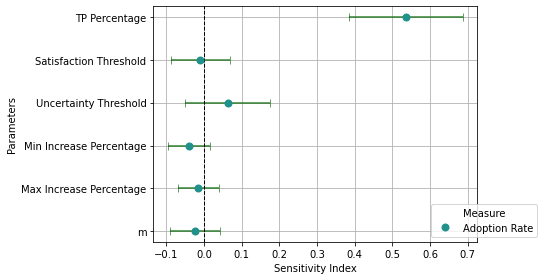

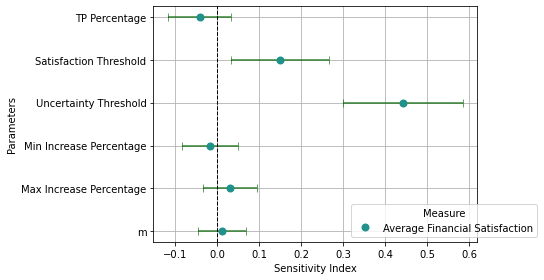

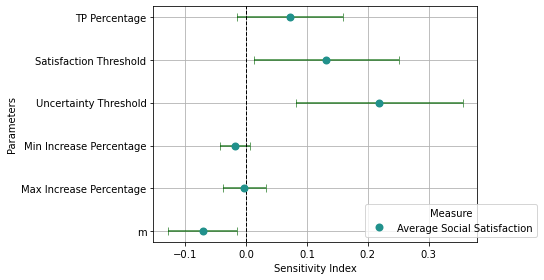

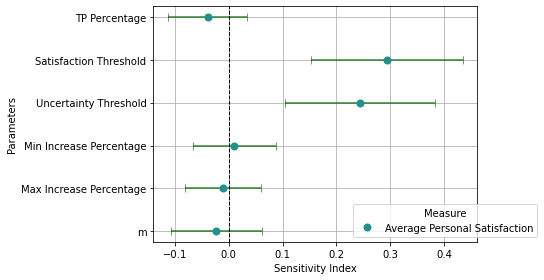

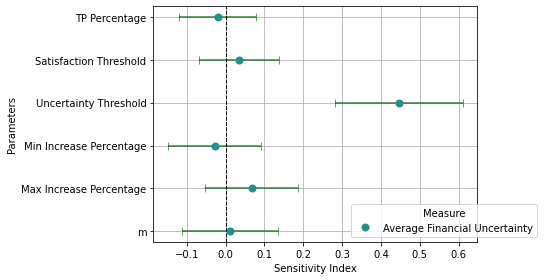

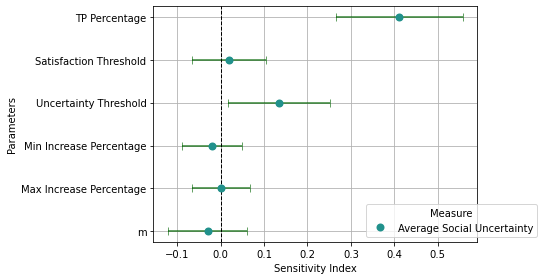

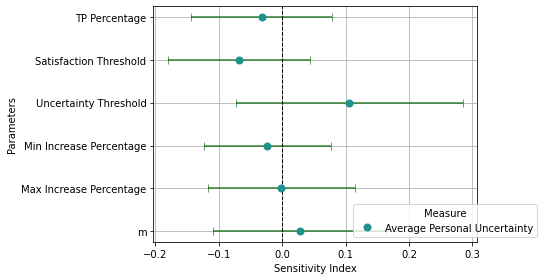

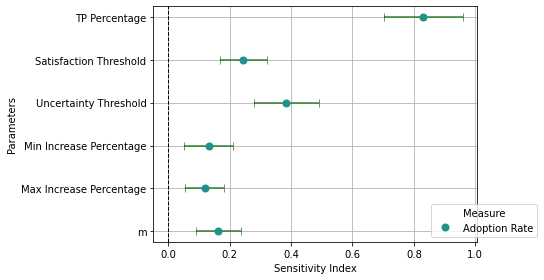

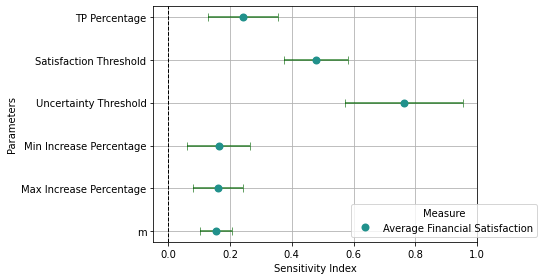

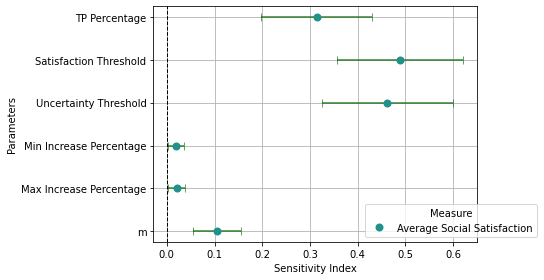

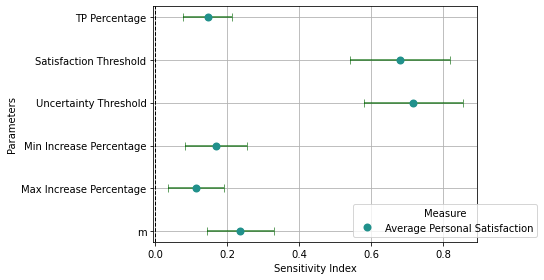

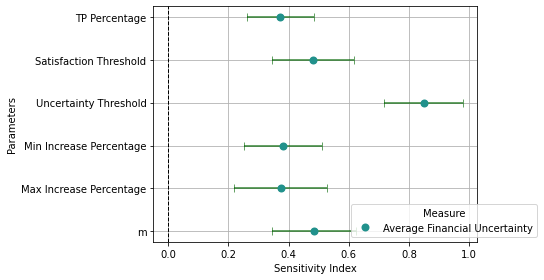

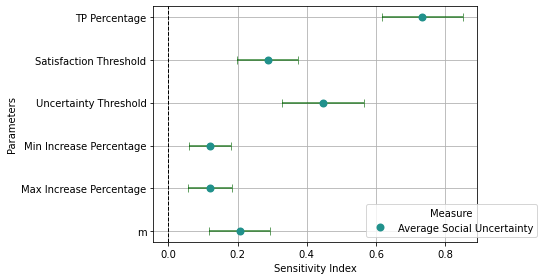

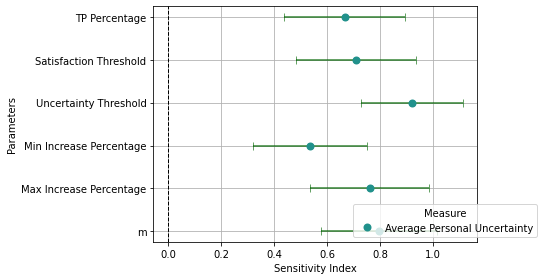

Plotting for Holme-Kim:


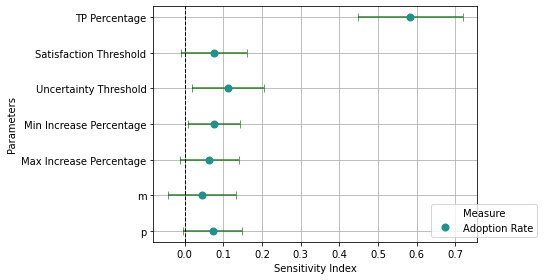

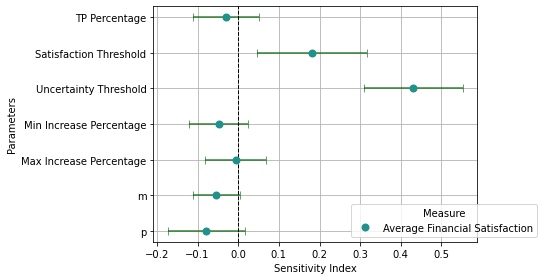

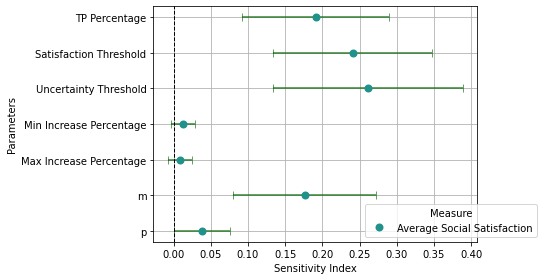

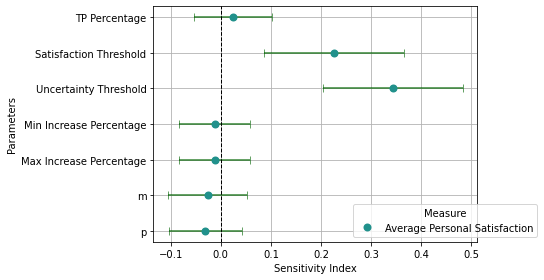

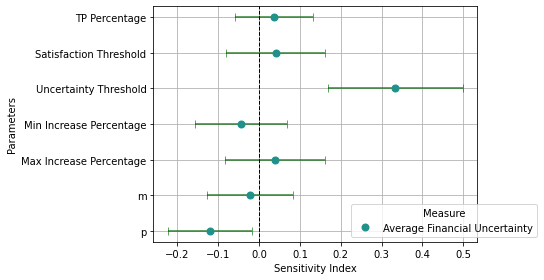

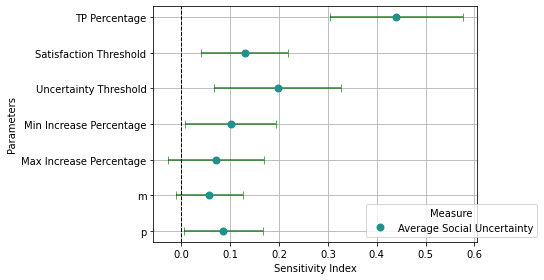

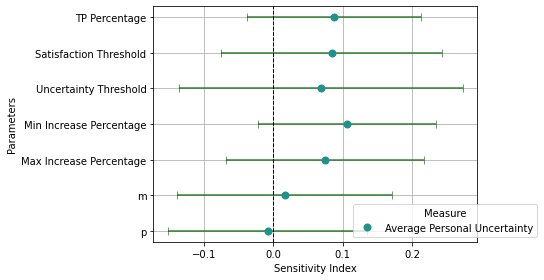

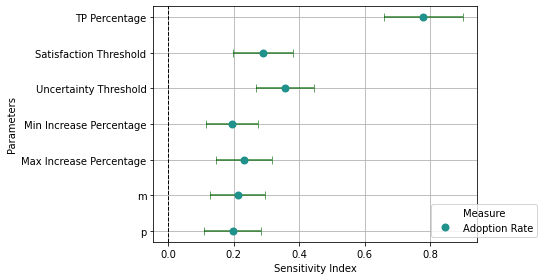

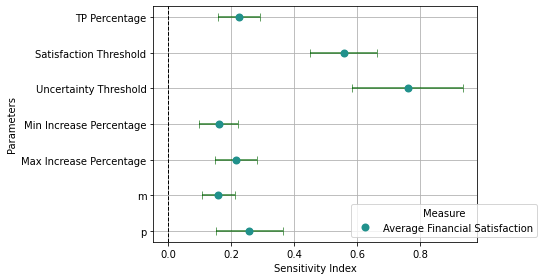

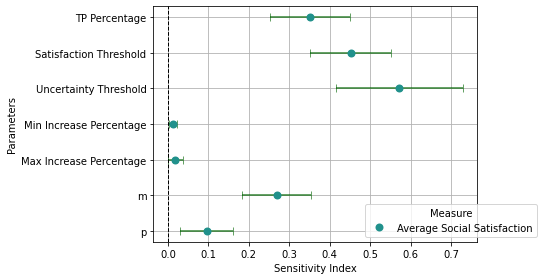

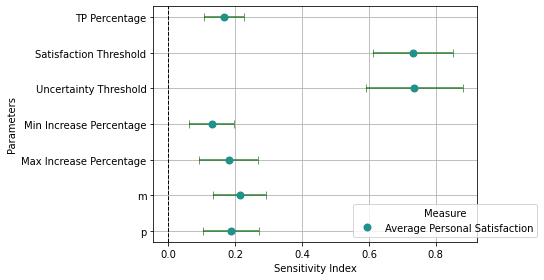

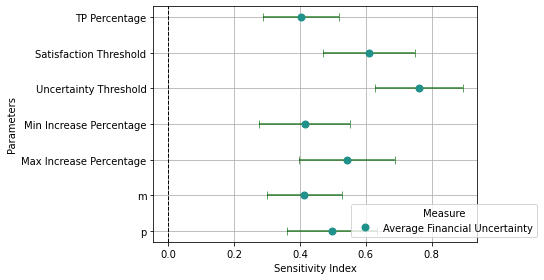

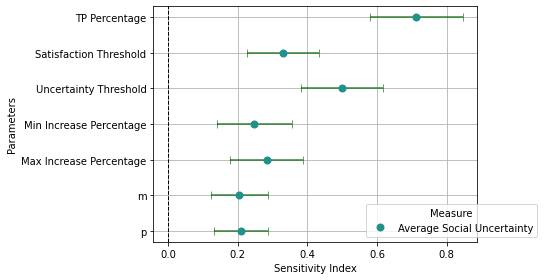

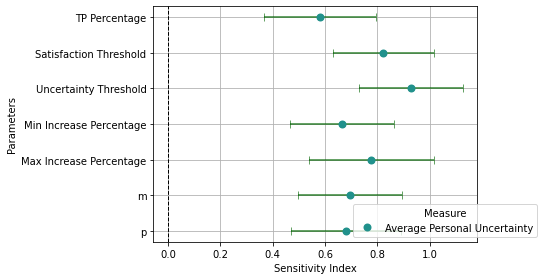

Plotting for Random Regular:


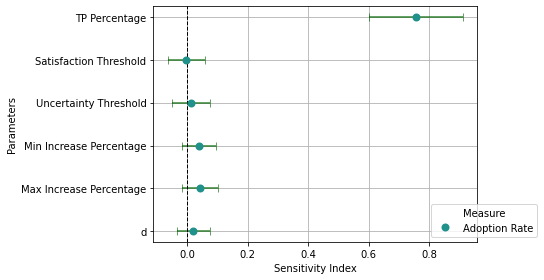

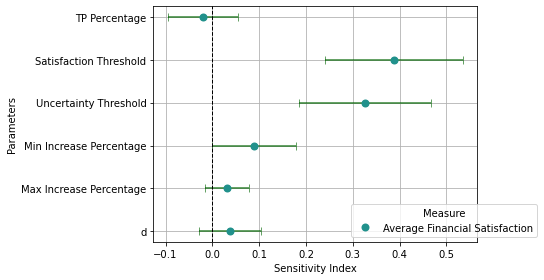

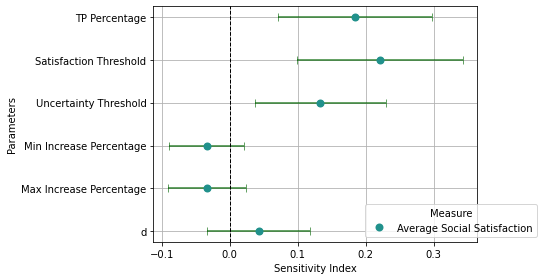

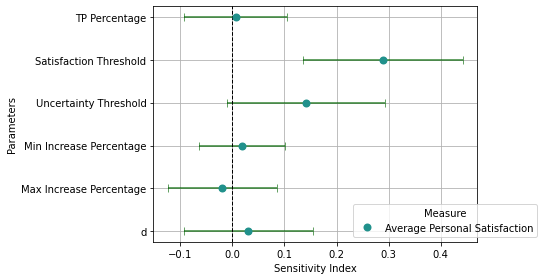

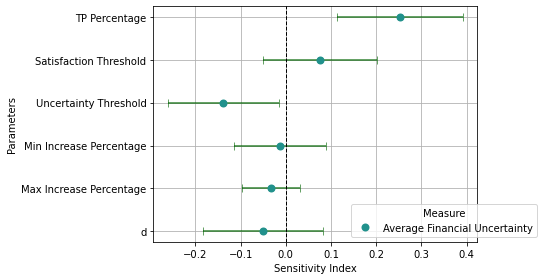

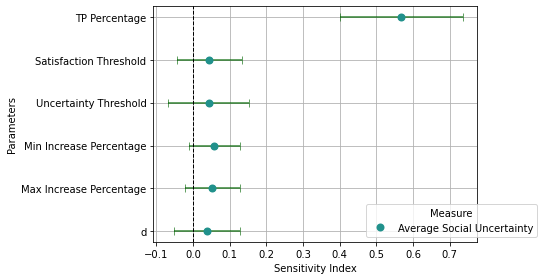

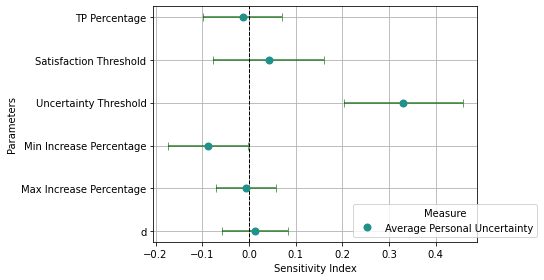

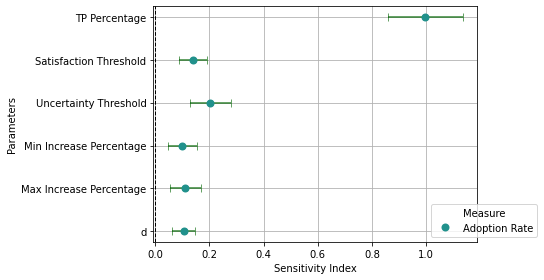

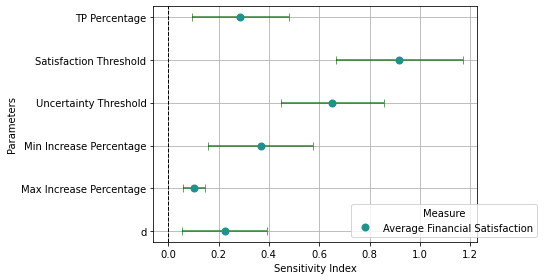

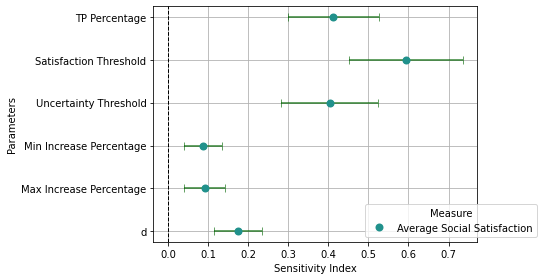

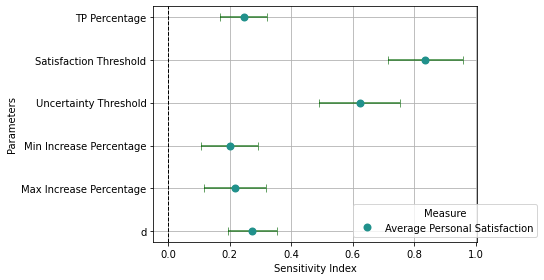

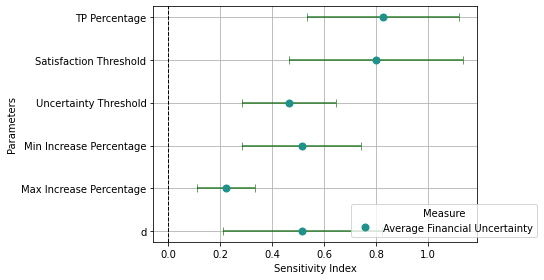

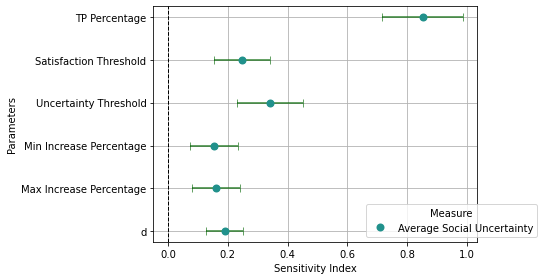

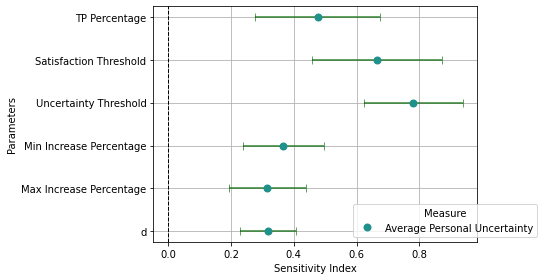

Plotting for Watts-Strogatz:


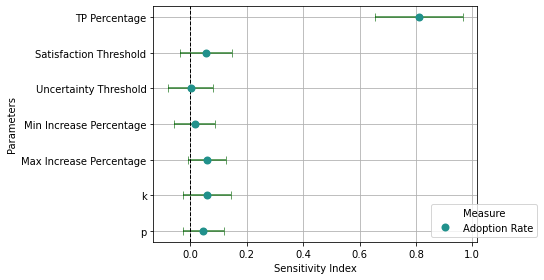

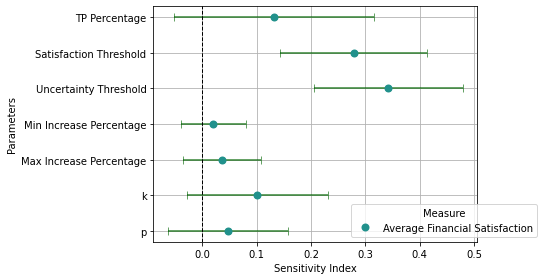

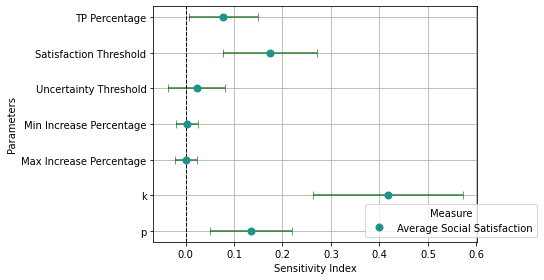

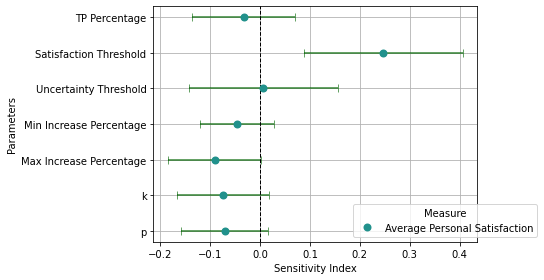

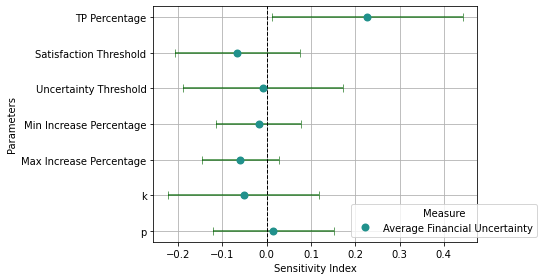

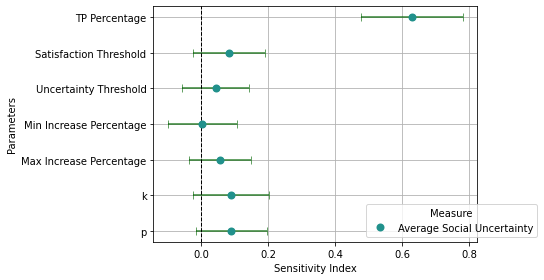

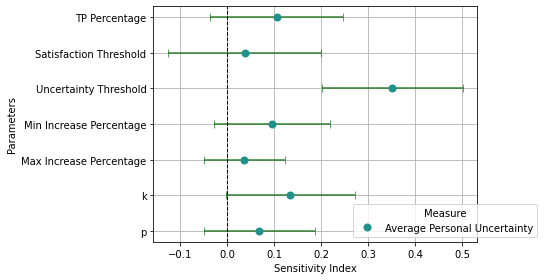

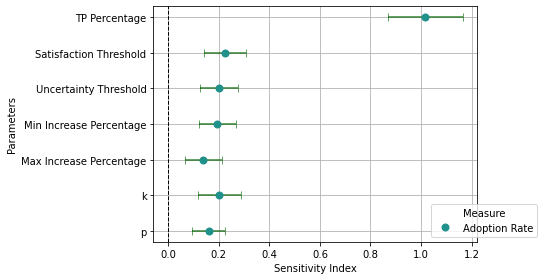

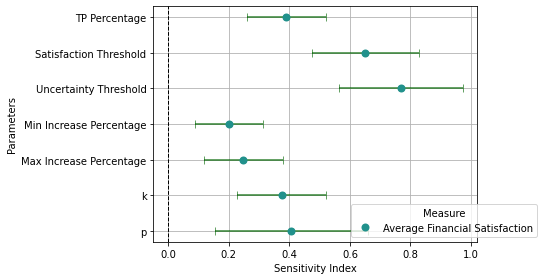

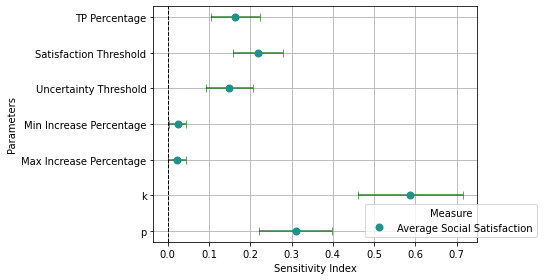

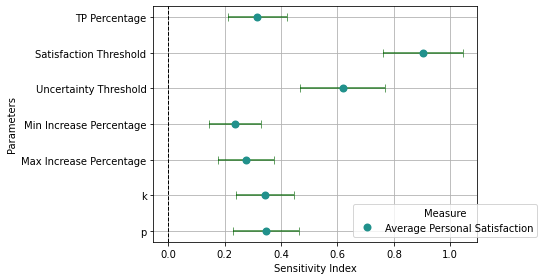

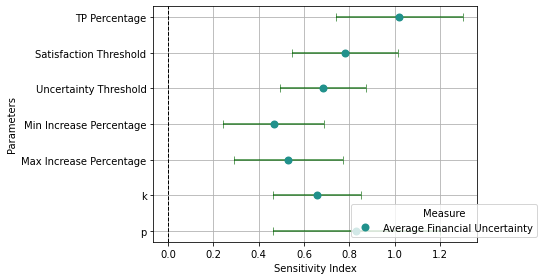

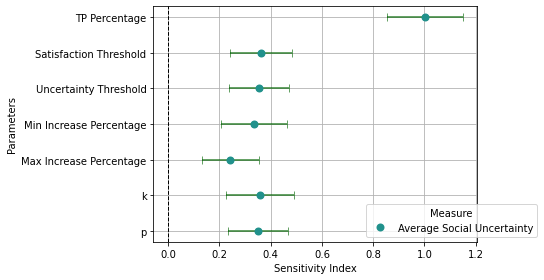

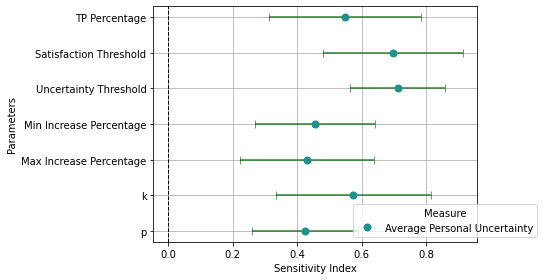

In [66]:
# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) and save without titles
def plot_sensitivity_by_measure(df, statistic, network):
    measures = df['Measure'].unique()
    for measure in measures:
        plt.figure(figsize=(8, 4))
        subset_df = df[(df['Measure'] == measure) & (df['Statistic'].str.startswith(statistic))]
        
        # Plot dots
        sns.stripplot(data=subset_df[subset_df['Statistic'] == statistic], 
                      x='Value', y='Parameter', hue='Measure', palette='viridis', jitter=False, size=8)
        
        # Add error bars
        main_data = subset_df[subset_df['Statistic'] == statistic]
        conf_data = subset_df[subset_df['Statistic'] == f'{statistic}_conf']
        for idx, row in main_data.iterrows():
            plt.errorbar(x=row['Value'], y=row['Parameter'], 
                         xerr=conf_data[conf_data['Parameter'] == row['Parameter']]['Value'].values, 
                         fmt='o', color='darkgreen', elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Parameters')
        plt.legend(title='Measure', bbox_to_anchor=(1.2, 0), loc='lower right')

        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Generate and save plots for each network
for network, df in network_data_frames.items():
    melted_df = pd.melt(df, id_vars=['Parameter', 'Measure'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                         var_name='Statistic', value_name='Value')
    print(f"Plotting for {network}:")
    plot_sensitivity_by_measure(melted_df, 'S1', network)
    plot_sensitivity_by_measure(melted_df, 'ST', network)

In [129]:

# Network problems configuration
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}
sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}
# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)
all_networks_df.to_csv('combined_networks_data.csv', index=False)

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks:")
print(all_networks_df.head(20))


Combined Data for All Networks:
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
5  -0.024590  0.163561  0.066617  0.073316                        m   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
11  0.012813  0.153872  0.057256  0.051346                        m   
12  0.071311  0.313820  0.087103  0.115554   

In [127]:
save_dir = "/Applications/UNI/ThesisNew/Plots/No Homophily Results"
os.makedirs(save_dir, exist_ok=True)

# Adjusted Network problems configuration to only include relevant parameters
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20]] 
    },
    'Barabasi-Albert': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20]]  
    },
    'Random Regular': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20]]  
    },
    'Holme-Kim': {
        'num_vars': 5,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

# Filter out the parameters 'm', 'p', 'd'
filtered_parameters = ['TP Percentage', 'Satisfaction Threshold', 'Uncertainty Threshold', 'Min Increase Percentage', 'Max Increase Percentage']
filtered_df = all_networks_df[all_networks_df['Parameter'].isin(filtered_parameters)]

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks (Filtered):")
print(filtered_df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) across all networks
def plot_sensitivity_all_networks(df, statistic):
    measures = df['Measure'].unique()
    for measure in measures:
        plt.figure(figsize=(12, 10))
        subset_df = df[(df['Measure'] == measure) & (df['Statistic'].str.startswith(statistic))]
        
        # Unique parameters and networks for spacing
        unique_parameters = subset_df['Parameter'].unique()
        unique_networks = subset_df['Network'].unique()
        
        # Create a dictionary to store y positions for each network
        y_offsets = {network: i * 0.15 for i, network in enumerate(unique_networks)}

        # Plot dots with offsets and add error bars
        for network in unique_networks:
            network_data = subset_df[(subset_df['Network'] == network) & (subset_df['Statistic'] == statistic)]
            y_positions = [i + y_offsets[network] for i in range(len(network_data))]
            scatter = plt.scatter(network_data['Value'], y_positions, label=network, s=100, alpha=0.7)

            # Add error bars with corresponding colors
            main_data = subset_df[(subset_df['Network'] == network) & (subset_df['Statistic'] == statistic)]
            conf_data = subset_df[(subset_df['Network'] == network) & (subset_df['Statistic'] == f'{statistic}_conf')]
            for idx, (row, y) in enumerate(zip(main_data.iterrows(), y_positions)):
                plt.errorbar(x=row[1]['Value'], y=y, 
                             xerr=conf_data[conf_data['Parameter'] == row[1]['Parameter']]['Value'].values, 
                             fmt='o', color=scatter.get_facecolor()[0], elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Parameters')
        plt.yticks(range(len(unique_parameters)), unique_parameters)
        #plt.title(f'{statistic} Sensitivity Analysis for {measure}')
        plt.legend(title='Network', bbox_to_anchor=(1, 1), loc='upper right')

        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"no_homophily_plot_{statistic}_{measure}.png"))
        plt.close()


# Generate and save combined plots for each measure
melted_all_networks_df = pd.melt(filtered_df, id_vars=['Parameter', 'Measure', 'Network'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')
plot_sensitivity_all_networks(melted_all_networks_df, 'S1')
plot_sensitivity_all_networks(melted_all_networks_df, 'ST')


Combined Data for All Networks (Filtered):
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
12  0.071311  0.313820  0.087103  0.115554            TP Percentage   
13  0.131891  0.487864  0.119086  0.131994   Satisfaction Threshold   
14  0.218500  0.462169  0.137360  

In [133]:


# Adjusted Network problems configuration to only include relevant parameters
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

# Filter out the parameters 'm', 'p', 'd'
filtered_parameters = ['TP Percentage', 'Satisfaction Threshold', 'Uncertainty Threshold', 'Min Increase Percentage', 'Max Increase Percentage', 'k', 'p','m','d']
filtered_df = all_networks_df[all_networks_df['Parameter'].isin(filtered_parameters)]

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks (Filtered):")
print(filtered_df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) for each network
def plot_sensitivity_each_network(df, statistic):
    networks = df['Network'].unique()
    for network in networks:
        plt.figure(figsize=(15, 13))
        subset_df = df[(df['Network'] == network) & (df['Statistic'].str.startswith(statistic))]
        
        # Unique parameters and measures for spacing
        unique_parameters = subset_df['Parameter'].unique()
        unique_measures = subset_df['Measure'].unique()
        
        # Create a dictionary to store y positions for each measure
        y_offsets = {parameter: i * 0.1 for i, parameter in enumerate(unique_parameters)}

        # Plot dots with offsets and add error bars
        for parameter in unique_parameters:
            parameter_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            y_positions = [i + y_offsets[parameter] for i in range(len(parameter_data))]
            scatter = plt.scatter(parameter_data['Value'], y_positions, label=parameter, s=100, alpha=0.7)

            # Add error bars with corresponding colors
            main_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            conf_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == f'{statistic}_conf')]
            for idx, (row, y) in enumerate(zip(main_data.iterrows(), y_positions)):
                plt.errorbar(x=row[1]['Value'], y=y, 
                             xerr=conf_data[conf_data['Measure'] == row[1]['Measure']]['Value'].values, 
                             fmt='o', color=scatter.get_facecolor()[0], elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Measures')
        plt.yticks(range(len(unique_measures)), unique_measures)
        plt.title(f'{statistic} Sensitivity Analysis for {network}')
        plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"no_homophily_plot_full_{statistic}_{network}.png"))
        plt.close()

# Generate and save combined plots for each measure
melted_all_networks_df = pd.melt(filtered_df, id_vars=['Parameter', 'Measure', 'Network'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')
plot_sensitivity_each_network(melted_all_networks_df, 'S1')
plot_sensitivity_each_network(melted_all_networks_df, 'ST')


Combined Data for All Networks (Filtered):
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
5  -0.024590  0.163561  0.066617  0.073316                        m   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
11  0.012813  0.153872  0.057256  0.051346                        m   
12  0.071311  0.313820  0.087103  

In [226]:
import matplotlib.patches as patches


# Adjusted Network problems configuration to only include relevant parameters
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

filtered_parameters = ['TP Percentage', 'Satisfaction Threshold', 'Uncertainty Threshold', 'Min Increase Percentage', 'Max Increase Percentage', 'k', 'p','m','d']
filtered_df = all_networks_df[all_networks_df['Parameter'].isin(filtered_parameters)]

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks (Filtered):")
print(filtered_df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) for each network
def plot_sensitivity_each_network(df, statistic):
    networks = df['Network'].unique()
    for network in networks:
        plt.figure(figsize=(14, 13))
        subset_df = df[(df['Network'] == network) & (df['Statistic'].str.startswith(statistic))]
        
        # Unique parameters and measures for spacing
        unique_parameters = subset_df['Parameter'].unique()
        unique_measures = subset_df['Measure'].unique()
        
        ax = plt.gca()
    
        
        # Create a dictionary to store y positions for each measure
        y_offsets = {parameter: i * 0.1 for i, parameter in enumerate(unique_parameters)}

        # Plot dots with offsets and add error bars
        for parameter in unique_parameters:
            parameter_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            y_positions = [i + y_offsets[parameter] for i in range(len(parameter_data))]
            scatter = plt.scatter(parameter_data['Value'], y_positions, label=parameter, s=100, alpha=0.8)

            # Add error bars with corresponding colors
            main_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            conf_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == f'{statistic}_conf')]
            for idx, (row, y) in enumerate(zip(main_data.iterrows(), y_positions)):
                plt.errorbar(x=row[1]['Value'], y=y, 
                             xerr=conf_data[conf_data['Measure'] == row[1]['Measure']]['Value'].values, 
                             fmt='o', color=scatter.get_facecolor()[0], elinewidth=2, capsize=4, alpha=0.6)

        xlim = ax.get_xlim()
        for i, measure in enumerate(unique_measures):
            color = 'white' if i % 2 == 0 else '#f0f0f0'
            ax.add_patch(patches.Rectangle((xlim[0], i-0.2), xlim[1] - xlim[0], 0.98, color=color, zorder=0))
            
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index', fontsize=12)
        plt.ylabel('Measures', fontsize=12)
        plt.yticks(range(len(unique_measures)), unique_measures, fontsize=13)
        #plt.title(f'{statistic} Sensitivity Analysis for {network}')
        plt.legend(title='Parameter', bbox_to_anchor=(0.5, -0.05), loc='upper center', fontsize=13, title_fontsize=14, ncol=4)



        plt.grid(axis='x')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"no_homophily_plot_full_{statistic}_{network}.png"))
        plt.close()


# Generate and save combined plots for each measure
melted_all_networks_df = pd.melt(filtered_df, id_vars=['Parameter', 'Measure', 'Network'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')
plot_sensitivity_each_network(melted_all_networks_df, 'S1')
plot_sensitivity_each_network(melted_all_networks_df, 'ST')


Combined Data for All Networks (Filtered):
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
5  -0.024590  0.163561  0.066617  0.073316                        m   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
11  0.012813  0.153872  0.057256  0.051346                        m   
12  0.071311  0.313820  0.087103  

In [227]:
# Pivot the DataFrame to get the desired format
pivot_df = filtered_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='S1')

# Rename columns to include 'ST - ' prefix
pivot_df.columns = [f'S1 - {col}' for col in pivot_df.columns]

# Reset the index to make 'Measure' and 'Parameter' columns again
pivot_df.reset_index(inplace=True)

# Save to Excel
pivot_df.to_excel('no_homophily_network_pivot_S1.xlsx', index=False)

# Display the combined DataFrame to verify structure
print("Pivoted Data for All Networks:")
print(pivot_df.head())

Pivoted Data for All Networks:
         Measure                Parameter  S1 - Barabasi-Albert  \
0  Adoption Rate  Max Increase Percentage             -0.014504   
1  Adoption Rate  Min Increase Percentage             -0.039232   
2  Adoption Rate   Satisfaction Threshold             -0.009299   
3  Adoption Rate            TP Percentage              0.536010   
4  Adoption Rate    Uncertainty Threshold              0.063167   

   S1 - Holme-Kim  S1 - Random Regular  S1 - Watts-Strogatz  
0        0.063932             0.041018             0.058509  
1        0.076345             0.037784             0.014665  
2        0.076119            -0.002942             0.054961  
3        0.583857             0.755862             0.809443  
4        0.112309             0.012819             0.001268  


In [213]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl import Workbook

#Pivot the DataFrame to get the desired format for S1
pivot_s1_df = filtered_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='S1')
pivot_s1_df.columns = [f'S1 - {col}' for col in pivot_s1_df.columns]
pivot_s1_df.reset_index(inplace=True)

# Pivot the DataFrame to get the desired format for ST
pivot_st_df = filtered_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='ST')
pivot_st_df.columns = [f'ST - {col}' for col in pivot_st_df.columns]
pivot_st_df.reset_index(inplace=True)

# Merge the two pivot tables
pivot_df = pd.merge(pivot_s1_df, pivot_st_df, on=['Measure', 'Parameter'])

# Save to Excel
file_path = 'no_homophily_network_pivot_2.xlsx'
pivot_df.to_excel(file_path, index=False)

# Adjust the column width using openpyxl
wb = load_workbook(file_path)
ws = wb.active

# Set the width of the first column (Measure) and second column (Parameter)
ws.column_dimensions['A'].width = 20
ws.column_dimensions['B'].width = 30

# Save the workbook with adjusted column widths
wb.save(file_path)

# Display the combined DataFrame to verify structure
print("Pivoted Data for All Networks:")
print(pivot_df.head())

Pivoted Data for All Networks:
         Measure                Parameter  S1 - Barabasi-Albert  \
0  Adoption Rate  Max Increase Percentage             -0.014504   
1  Adoption Rate  Min Increase Percentage             -0.039232   
2  Adoption Rate   Satisfaction Threshold             -0.009299   
3  Adoption Rate            TP Percentage              0.536010   
4  Adoption Rate    Uncertainty Threshold              0.063167   

   S1 - Holme-Kim  S1 - Random Regular  S1 - Watts-Strogatz  \
0        0.063932             0.041018             0.058509   
1        0.076345             0.037784             0.014665   
2        0.076119            -0.002942             0.054961   
3        0.583857             0.755862             0.809443   
4        0.112309             0.012819             0.001268   

   ST - Barabasi-Albert  ST - Holme-Kim  ST - Random Regular  \
0              0.119769        0.230264             0.111354   
1              0.132169        0.193653             0.10077

In [183]:

# Function to categorize influence
def categorize_influence(st_value):
    if st_value > 0.6:
        return 'High influence'
    elif 0.2 <= st_value <= 0.4:
        return 'Moderate influence'
    elif 0 <= st_value < 0.2:
        return 'Negligible influence'
    else:
        return 'Other'  # To catch any other values, if necessary

# Apply the categorization
filtered_df['Influence'] = filtered_df['ST'].apply(categorize_influence)

# Initialize a list to collect the data for the new DataFrame
data = []

# Group by Network and Measure, then collect the parameter names based on influence category
grouped = filtered_df.groupby(['Network', 'Measure'])
for (network, measure), group in grouped:
    high_influence_params = group[group['Influence'] == 'High influence']['Parameter'].tolist()
    moderate_influence_params = group[group['Influence'] == 'Moderate influence']['Parameter'].tolist()
    negligible_influence_params = group[group['Influence'] == 'Negligible influence']['Parameter'].tolist()
    
    # Join the parameter names into a single string for each category
    high_influence_str = ', '.join(high_influence_params)
    moderate_influence_str = ', '.join(moderate_influence_params)
    negligible_influence_str = ', '.join(negligible_influence_params)
    
    data.append([network, measure, high_influence_str, moderate_influence_str, negligible_influence_str])

# Create the new DataFrame
influence_df = pd.DataFrame(data, columns=['Network', 'Measure', 'High influence', 'Moderate influence', 'Negligible influence'])

# Save to Excel
influence_df.to_excel('no_homophily_network_influence_summary.xlsx', index=False)


Combined Data for All Networks (Filtered):
          S1        ST   S1_conf   ST_conf Parameter  \
5  -0.024590  0.163561  0.066617  0.073316         m   
11  0.012813  0.153872  0.057256  0.051346         m   
17 -0.071499  0.105225  0.056737  0.049569         m   
23 -0.023015  0.235646  0.084683  0.093496         m   
29  0.011540  0.484835  0.124044  0.140924         m   
35 -0.029713  0.206648  0.091130  0.087712         m   
41  0.028166  0.796489  0.136324  0.219132         m   
47  0.044828  0.212742  0.087398  0.084252         m   
48  0.072295  0.196408  0.075401  0.086742         p   
54 -0.053677  0.159474  0.057902  0.051735         m   
55 -0.078240  0.257429  0.094054  0.106038         p   
61  0.176280  0.269298  0.095955  0.085297         m   
62  0.038294  0.095745  0.037187  0.065411         p   
68 -0.026020  0.214010  0.079048  0.078892         m   
69 -0.030612  0.189094  0.071900  0.083791         p   
75 -0.021781  0.413570  0.106068  0.114935         m   
76 -0

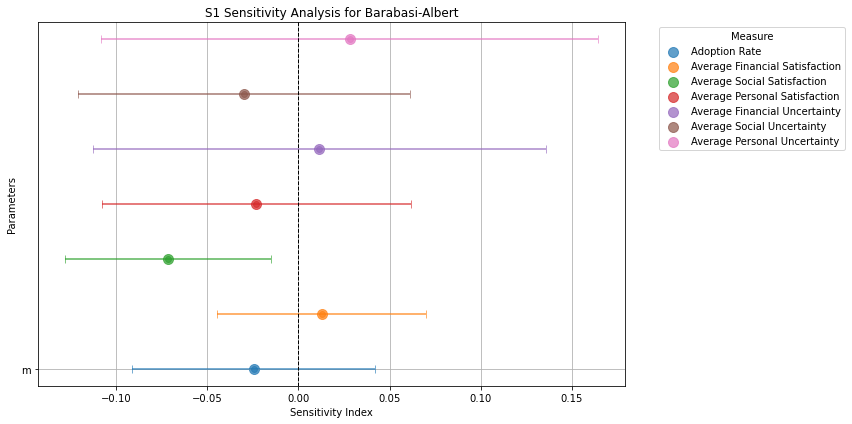

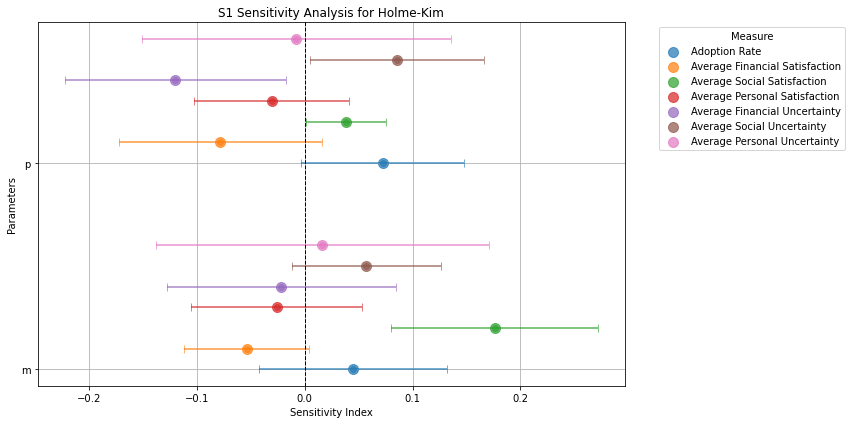

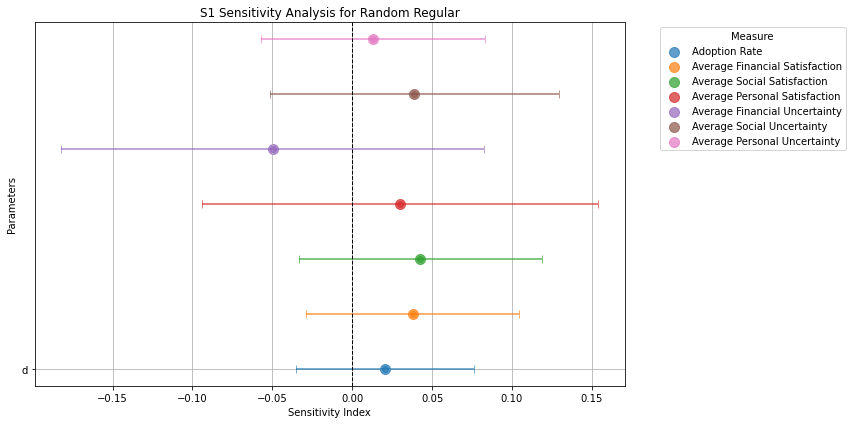

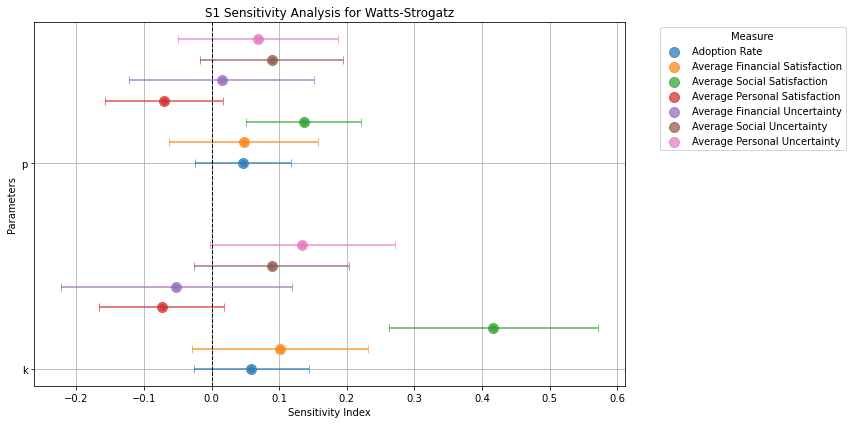

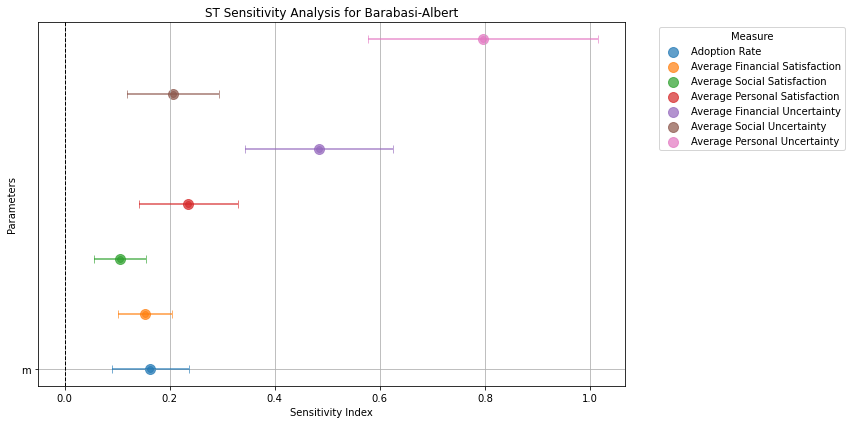

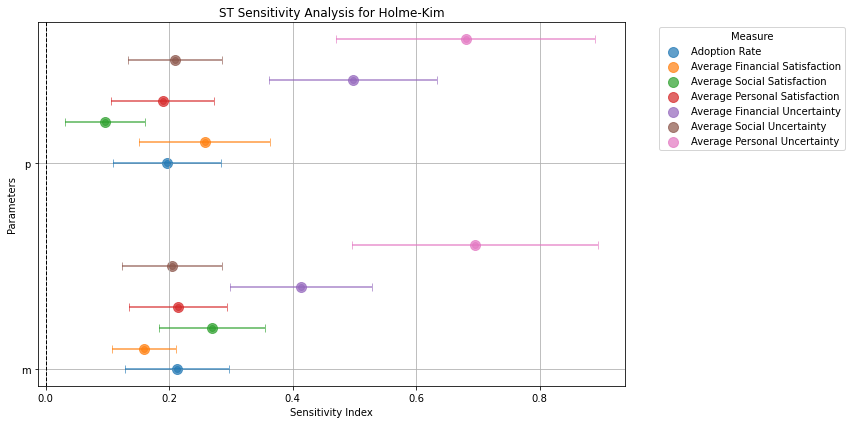

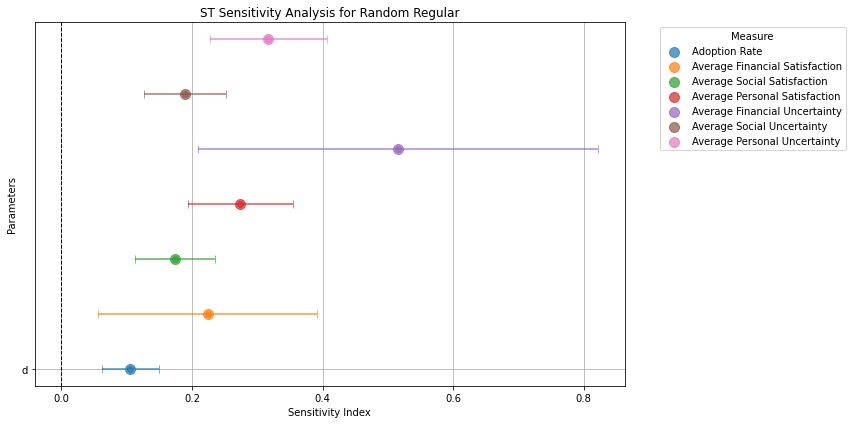

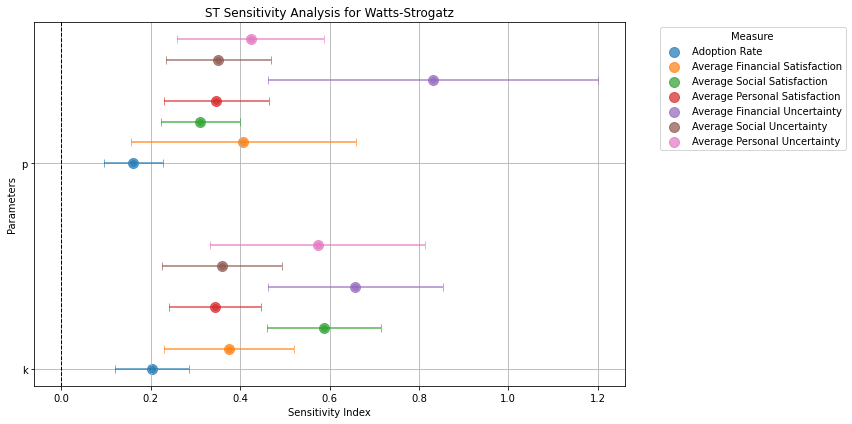

In [116]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Adjusted Network problems configuration to only include relevant parameters
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

# Filter out the parameters 'm', 'p', 'd'
filtered_parameters = ['m', 'k', 'p', 'd']
filtered_df = all_networks_df[all_networks_df['Parameter'].isin(filtered_parameters)]

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks (Filtered):")
print(filtered_df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) for each network
def plot_sensitivity_each_network(df, statistic):
    networks = df['Network'].unique()
    for network in networks:
        plt.figure(figsize=(12, 6))
        subset_df = df[(df['Network'] == network) & (df['Statistic'].str.startswith(statistic))]
        
        # Unique parameters and measures for spacing
        unique_parameters = subset_df['Parameter'].unique()
        unique_measures = subset_df['Measure'].unique()
        
        # Create a dictionary to store y positions for each measure
        y_offsets = {measure: i * 0.1 for i, measure in enumerate(unique_measures)}

        # Plot dots with offsets and add error bars
        for measure in unique_measures:
            measure_data = subset_df[(subset_df['Measure'] == measure) & (subset_df['Statistic'] == statistic)]
            y_positions = [i + y_offsets[measure] for i in range(len(measure_data))]
            scatter = plt.scatter(measure_data['Value'], y_positions, label=measure, s=100, alpha=0.7)

            # Add error bars with corresponding colors
            main_data = subset_df[(subset_df['Measure'] == measure) & (subset_df['Statistic'] == statistic)]
            conf_data = subset_df[(subset_df['Measure'] == measure) & (subset_df['Statistic'] == f'{statistic}_conf')]
            for idx, (row, y) in enumerate(zip(main_data.iterrows(), y_positions)):
                plt.errorbar(x=row[1]['Value'], y=y, 
                             xerr=conf_data[conf_data['Parameter'] == row[1]['Parameter']]['Value'].values, 
                             fmt='o', color=scatter.get_facecolor()[0], elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Parameters')
        plt.yticks(range(len(unique_parameters)), unique_parameters)
        plt.title(f'{statistic} Sensitivity Analysis for {network}')
        plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Generate and save combined plots for each measure
melted_all_networks_df = pd.melt(filtered_df, id_vars=['Parameter', 'Measure', 'Network'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')
plot_sensitivity_each_network(melted_all_networks_df, 'S1')
plot_sensitivity_each_network(melted_all_networks_df, 'ST')


In [180]:
save_dir = "/Applications/UNI/ThesisNew/Plots/No Homophily Results"


# Adjusted Network problems configuration to only include relevant parameters
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

# Filter out the parameters 'm', 'p', 'd'
filtered_parameters = ['k', 'p','m','d']
filtered_df = all_networks_df[all_networks_df['Parameter'].isin(filtered_parameters)]

# Display the combined DataFrame to verify structure
print("Combined Data for All Networks (Filtered):")
print(filtered_df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) for each network
def plot_sensitivity_each_network(df, statistic):
    networks = df['Network'].unique()
    for network in networks:
        plt.figure(figsize=(10, 6))
        subset_df = df[(df['Network'] == network) & (df['Statistic'].str.startswith(statistic))]
        
        # Unique parameters and measures for spacing
        unique_parameters = subset_df['Parameter'].unique()
        unique_measures = subset_df['Measure'].unique()
        
        # Create a dictionary to store y positions for each measure
        y_offsets = {parameter: i * 0.15 for i, parameter in enumerate(unique_parameters)}

        # Plot dots with offsets and add error bars
        for parameter in unique_parameters:
            parameter_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            y_positions = [i + y_offsets[parameter] for i in range(len(parameter_data))]
            scatter = plt.scatter(parameter_data['Value'], y_positions, label=parameter, s=100, alpha=0.7)

            # Add error bars with corresponding colors
            main_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == statistic)]
            conf_data = subset_df[(subset_df['Parameter'] == parameter) & (subset_df['Statistic'] == f'{statistic}_conf')]
            for idx, (row, y) in enumerate(zip(main_data.iterrows(), y_positions)):
                plt.errorbar(x=row[1]['Value'], y=y, 
                             xerr=conf_data[conf_data['Measure'] == row[1]['Measure']]['Value'].values, 
                             fmt='o', color=scatter.get_facecolor()[0], elinewidth=2, capsize=4, alpha=0.6)

        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.xlabel('Sensitivity Index')
        plt.ylabel('Measures')
        plt.yticks(range(len(unique_measures)), unique_measures)
        #plt.title(f'{statistic} Sensitivity Analysis for {network}')
        plt.legend(title='Parameter', bbox_to_anchor=(1, 0), loc='lower right')

        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"no_homophily_plot_{statistic}_{network}.png"))
        plt.close()

# Generate and save combined plots for each measure
melted_all_networks_df = pd.melt(filtered_df, id_vars=['Parameter', 'Measure', 'Network'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                                  var_name='Statistic', value_name='Value')
plot_sensitivity_each_network(melted_all_networks_df, 'S1')
plot_sensitivity_each_network(melted_all_networks_df, 'ST')


Combined Data for All Networks (Filtered):
          S1        ST   S1_conf   ST_conf Parameter  \
5  -0.024590  0.163561  0.066617  0.073316         m   
11  0.012813  0.153872  0.057256  0.051346         m   
17 -0.071499  0.105225  0.056737  0.049569         m   
23 -0.023015  0.235646  0.084683  0.093496         m   
29  0.011540  0.484835  0.124044  0.140924         m   
35 -0.029713  0.206648  0.091130  0.087712         m   
41  0.028166  0.796489  0.136324  0.219132         m   
47  0.044828  0.212742  0.087398  0.084252         m   
48  0.072295  0.196408  0.075401  0.086742         p   
54 -0.053677  0.159474  0.057902  0.051735         m   
55 -0.078240  0.257429  0.094054  0.106038         p   
61  0.176280  0.269298  0.095955  0.085297         m   
62  0.038294  0.095745  0.037187  0.065411         p   
68 -0.026020  0.214010  0.079048  0.078892         m   
69 -0.030612  0.189094  0.071900  0.083791         p   
75 -0.021781  0.413570  0.106068  0.114935         m   
76 -0

In [ ]:
network_problems = {
    'Watts-Strogatz': {
        'num_vars': 10,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1], [0, 10], [0, 1]]
    },
    'Barabasi-Albert': {
        'num_vars': 9,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'm', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]]
    },
    'Random Regular': {
        'num_vars': 9,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'd', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]]
    },
    'Holme-Kim': {
        'num_vars': 10,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20], [2, 10], [0, 1],[0, 10], [0, 1]]
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "epsilon": "epsilon",
    "alpha”: “alpha",
    "beta”: “beta",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into a combined DataFrame
combined_data_frames = []
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network  # Add a column for network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        combined_data_frames.append(combined_df)

# Combine all networks into a single DataFrame
all_networks_df = pd.concat(combined_data_frames, ignore_index=True)

Data for Barabasi-Albert:
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.536010  0.830005  0.150413  0.128456            TP Percentage   
1  -0.009299  0.243946  0.077438  0.076442   Satisfaction Threshold   
2   0.063167  0.385198  0.112518  0.106221    Uncertainty Threshold   
3  -0.039232  0.132169  0.055734  0.080425  Min Increase Percentage   
4  -0.014504  0.119769  0.053730  0.063504  Max Increase Percentage   
5  -0.024590  0.163561  0.066617  0.073316                        m   
6  -0.041547  0.241827  0.074808  0.114264            TP Percentage   
7   0.150063  0.479031  0.117324  0.103202   Satisfaction Threshold   
8   0.441971  0.762061  0.142448  0.190438    Uncertainty Threshold   
9  -0.016917  0.162950  0.067249  0.101676  Min Increase Percentage   
10  0.030588  0.161531  0.065186  0.079894  Max Increase Percentage   
11  0.012813  0.153872  0.057256  0.051346                        m   
12  0.071311  0.313820  0.087103  0.115554         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


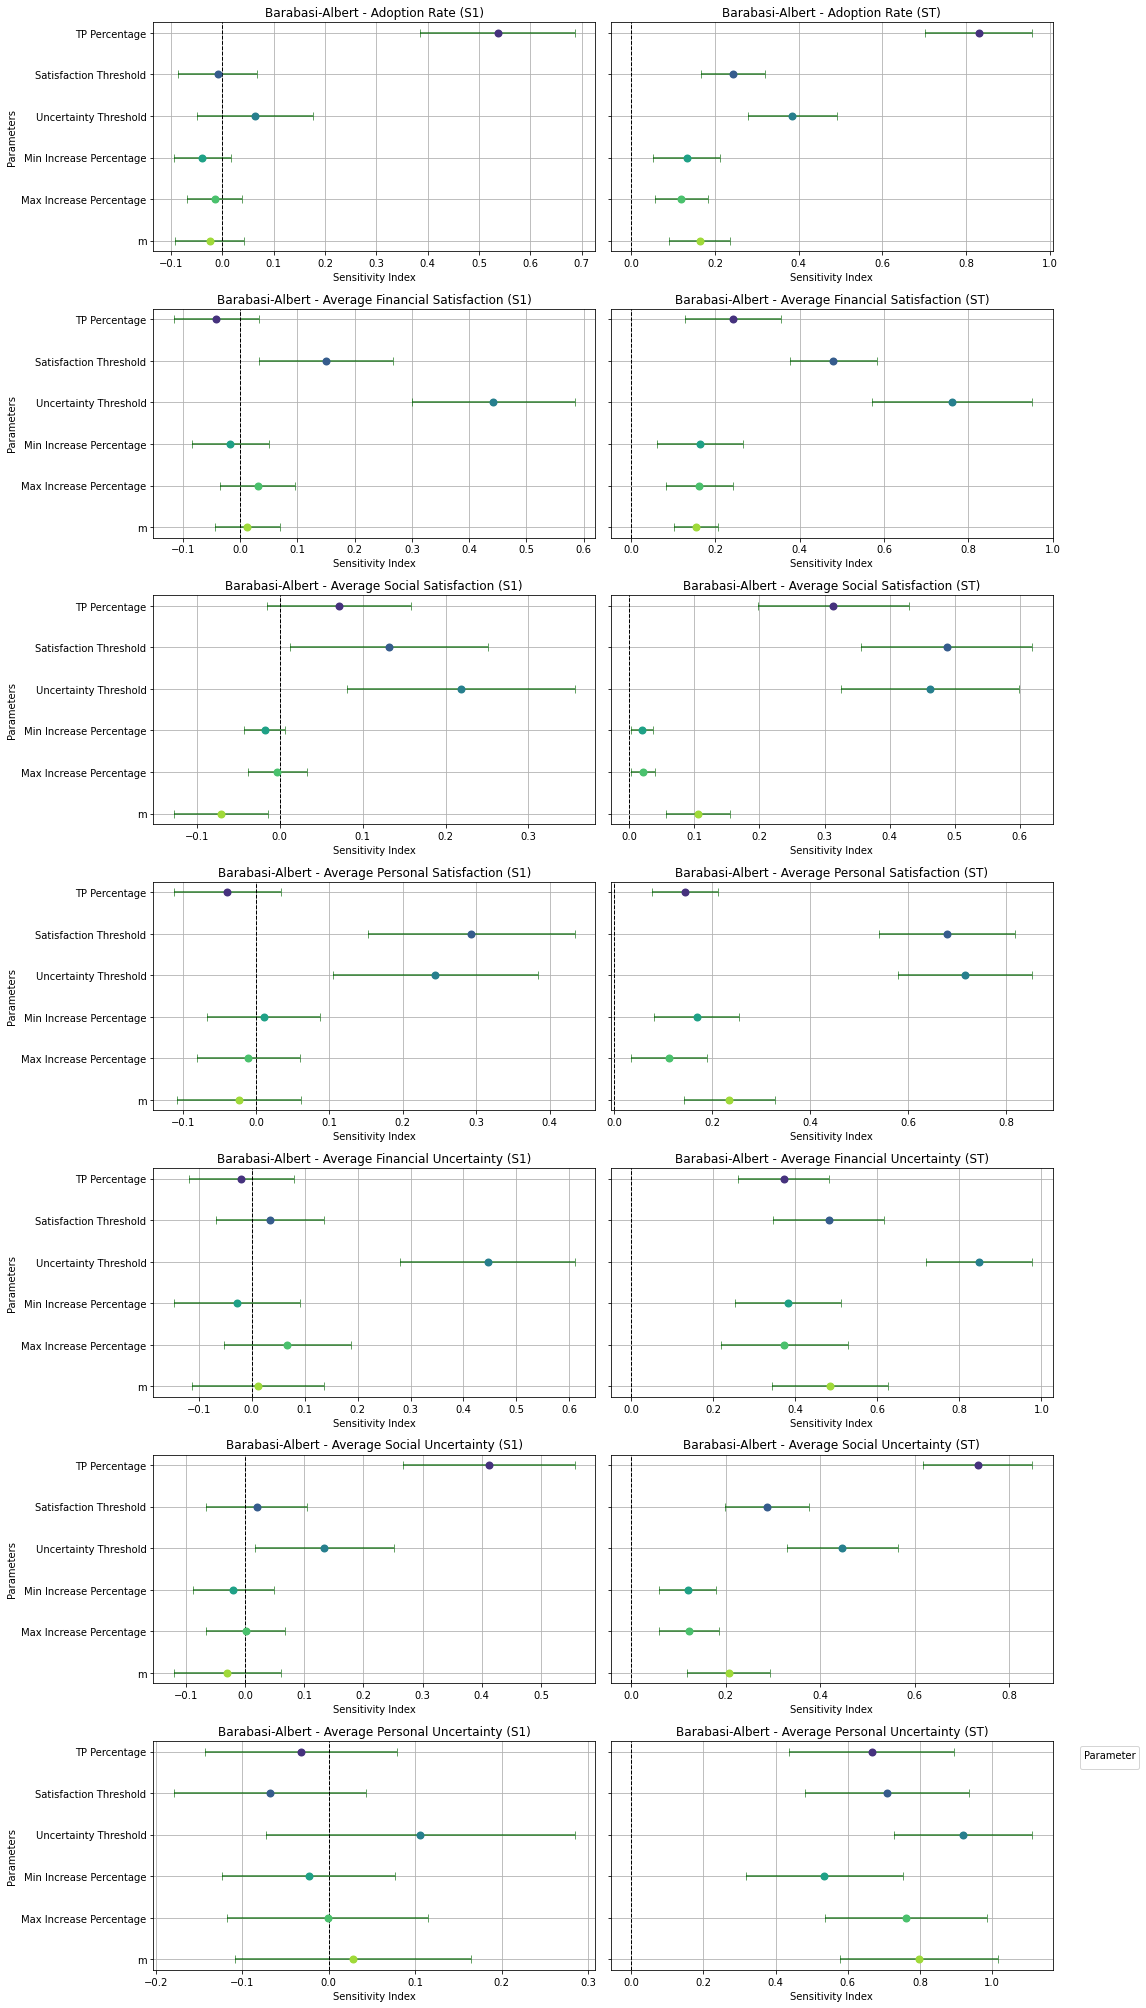

Plotting for Holme-Kim:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


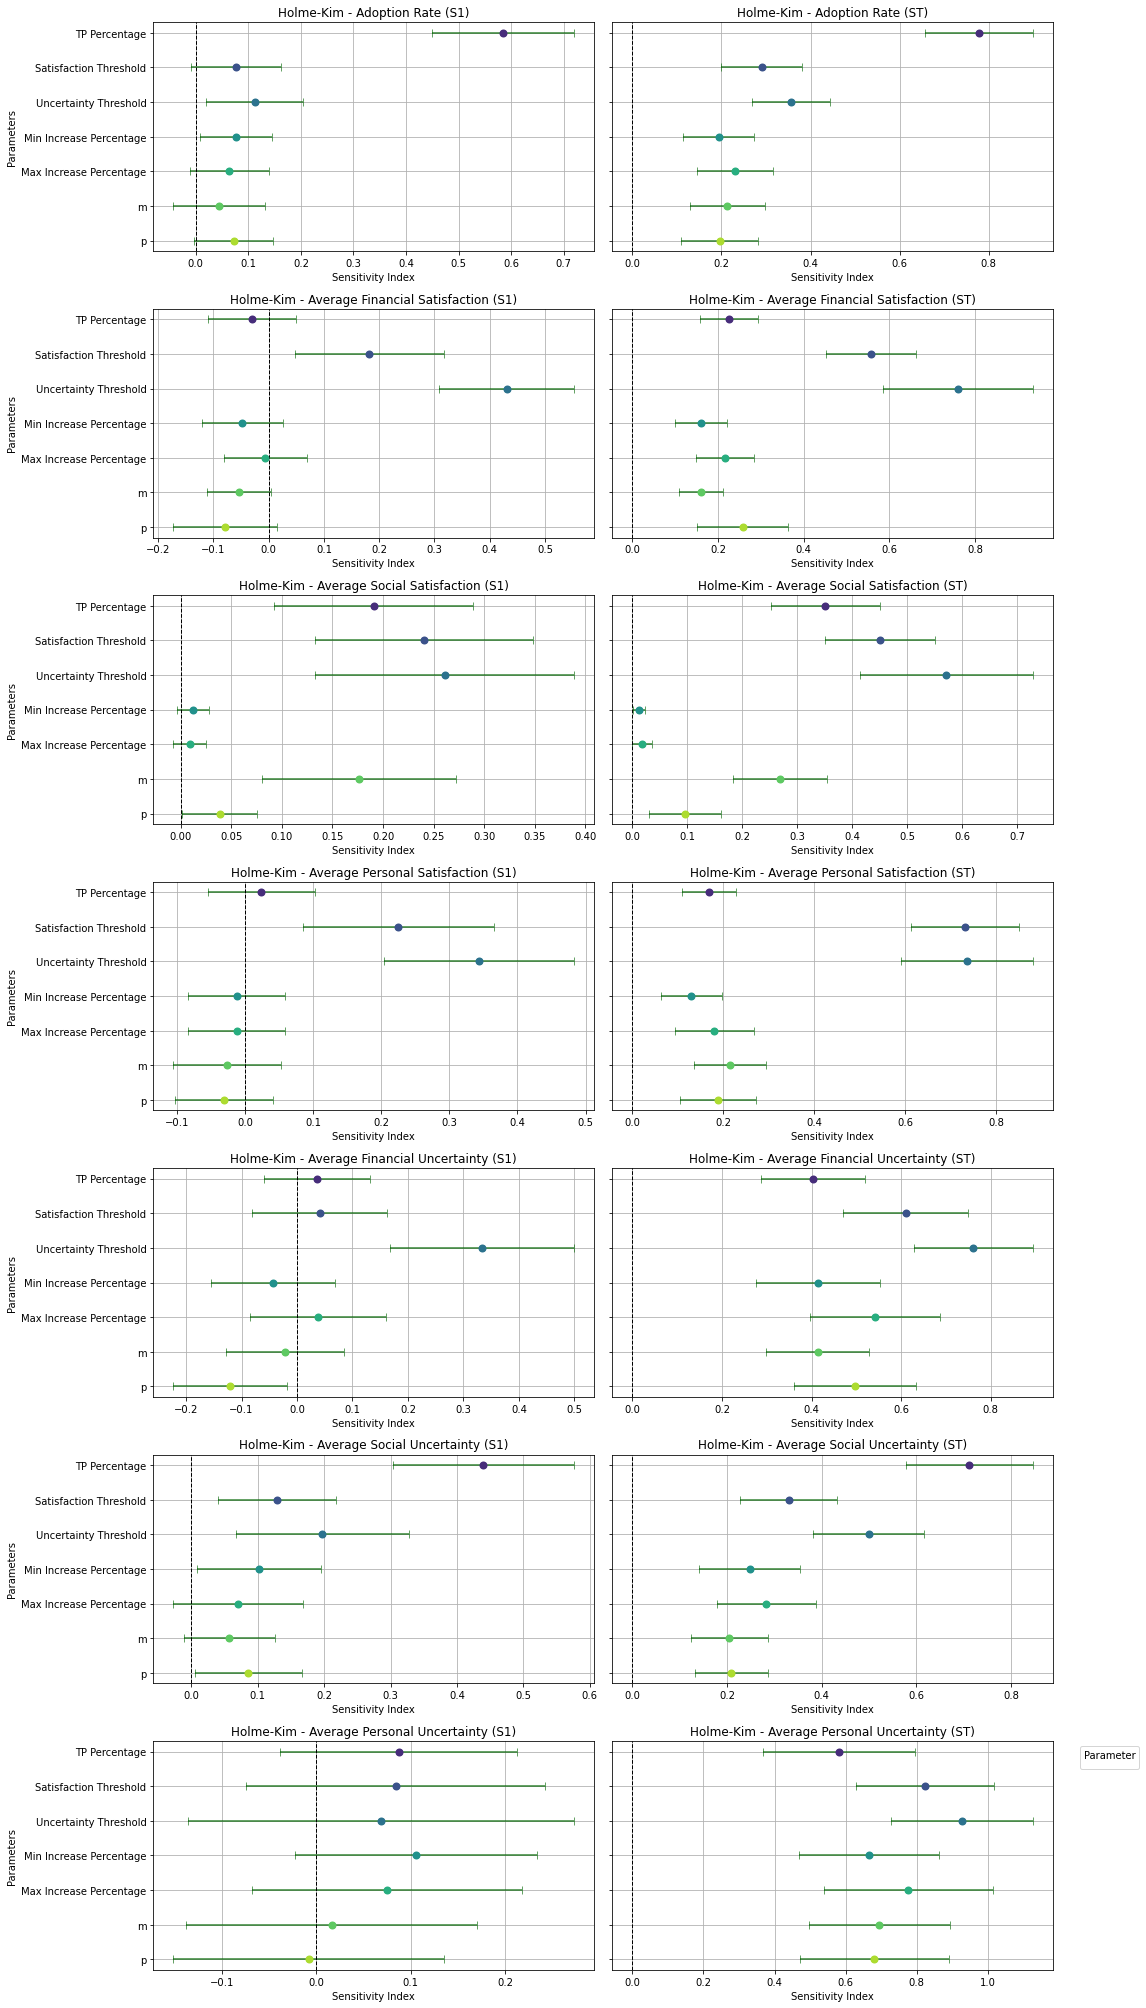

Plotting for Random Regular:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


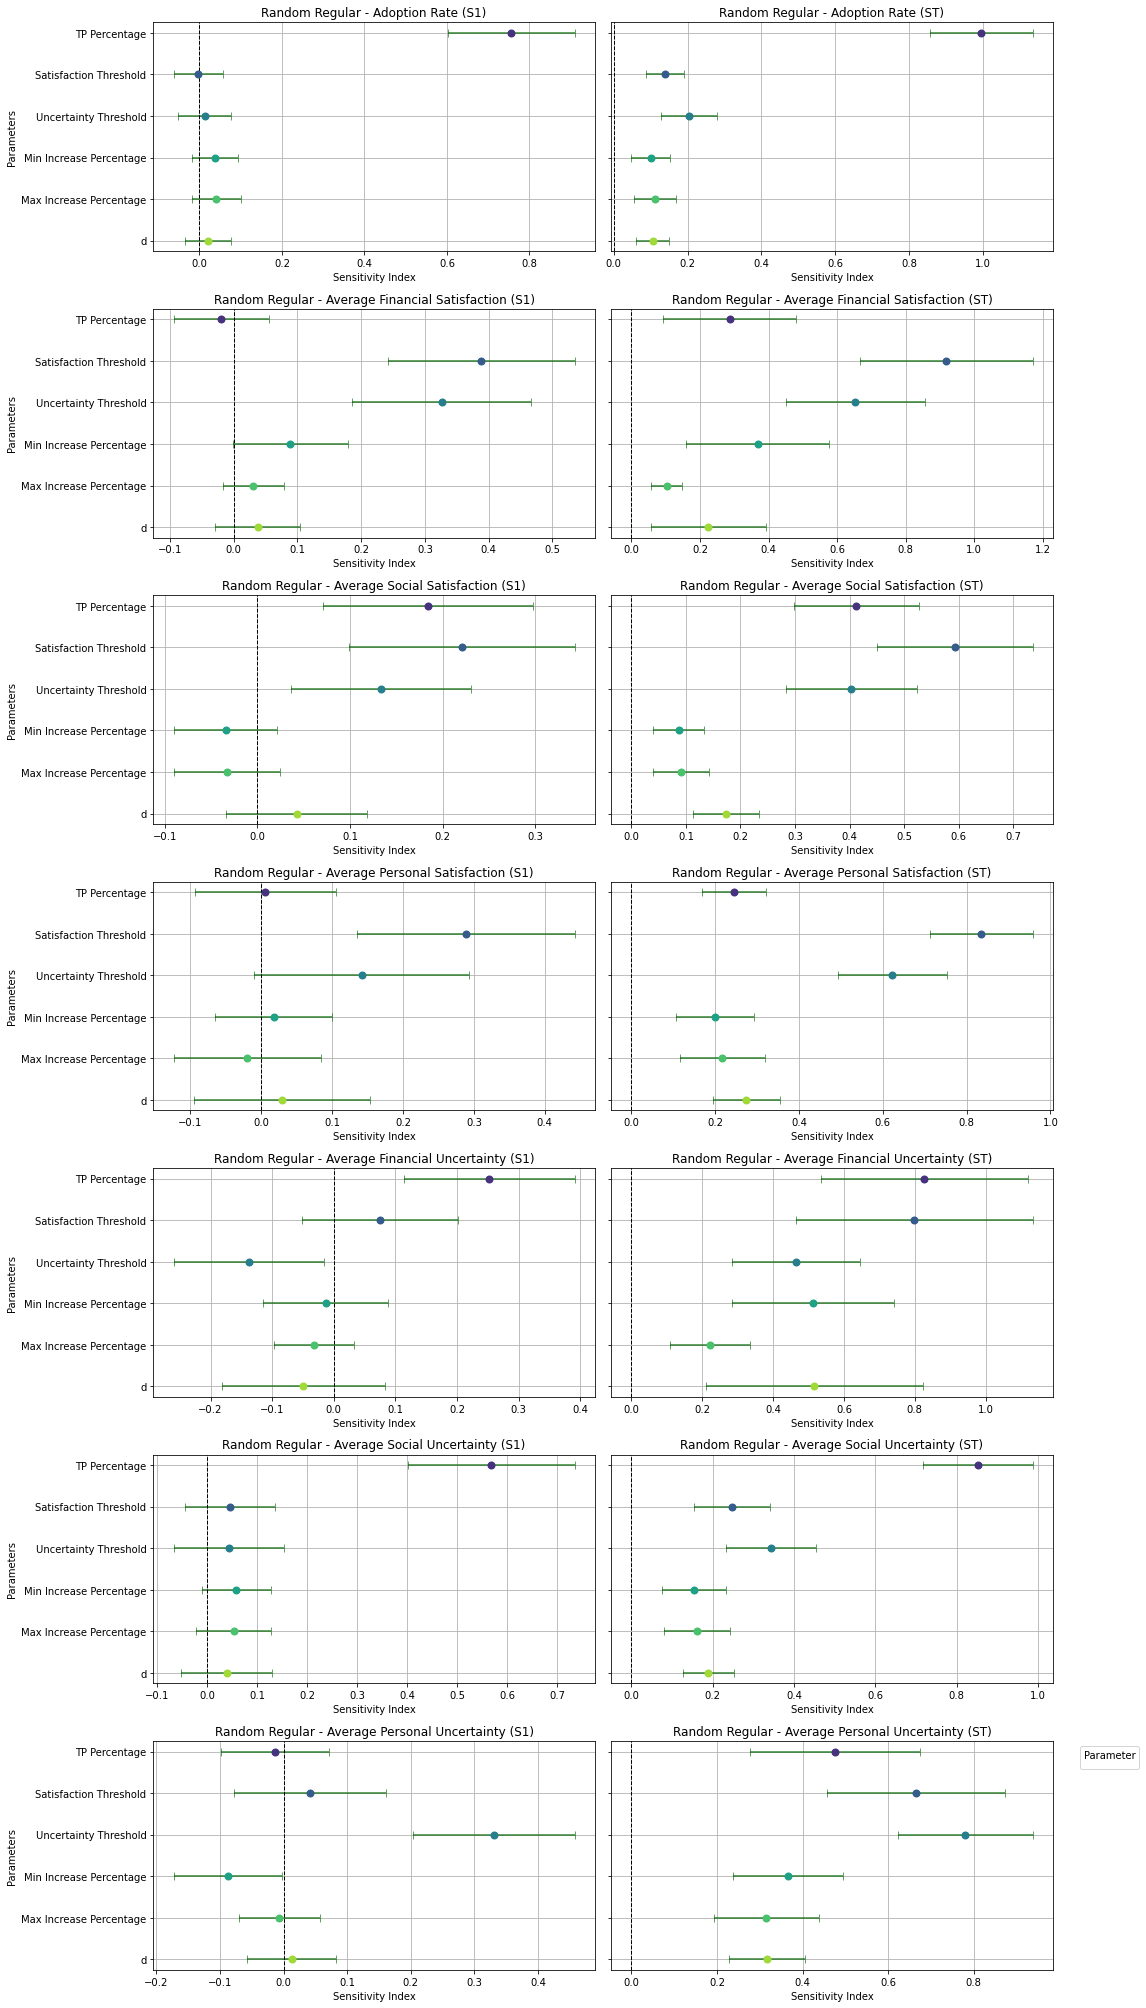

Plotting for Watts-Strogatz:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


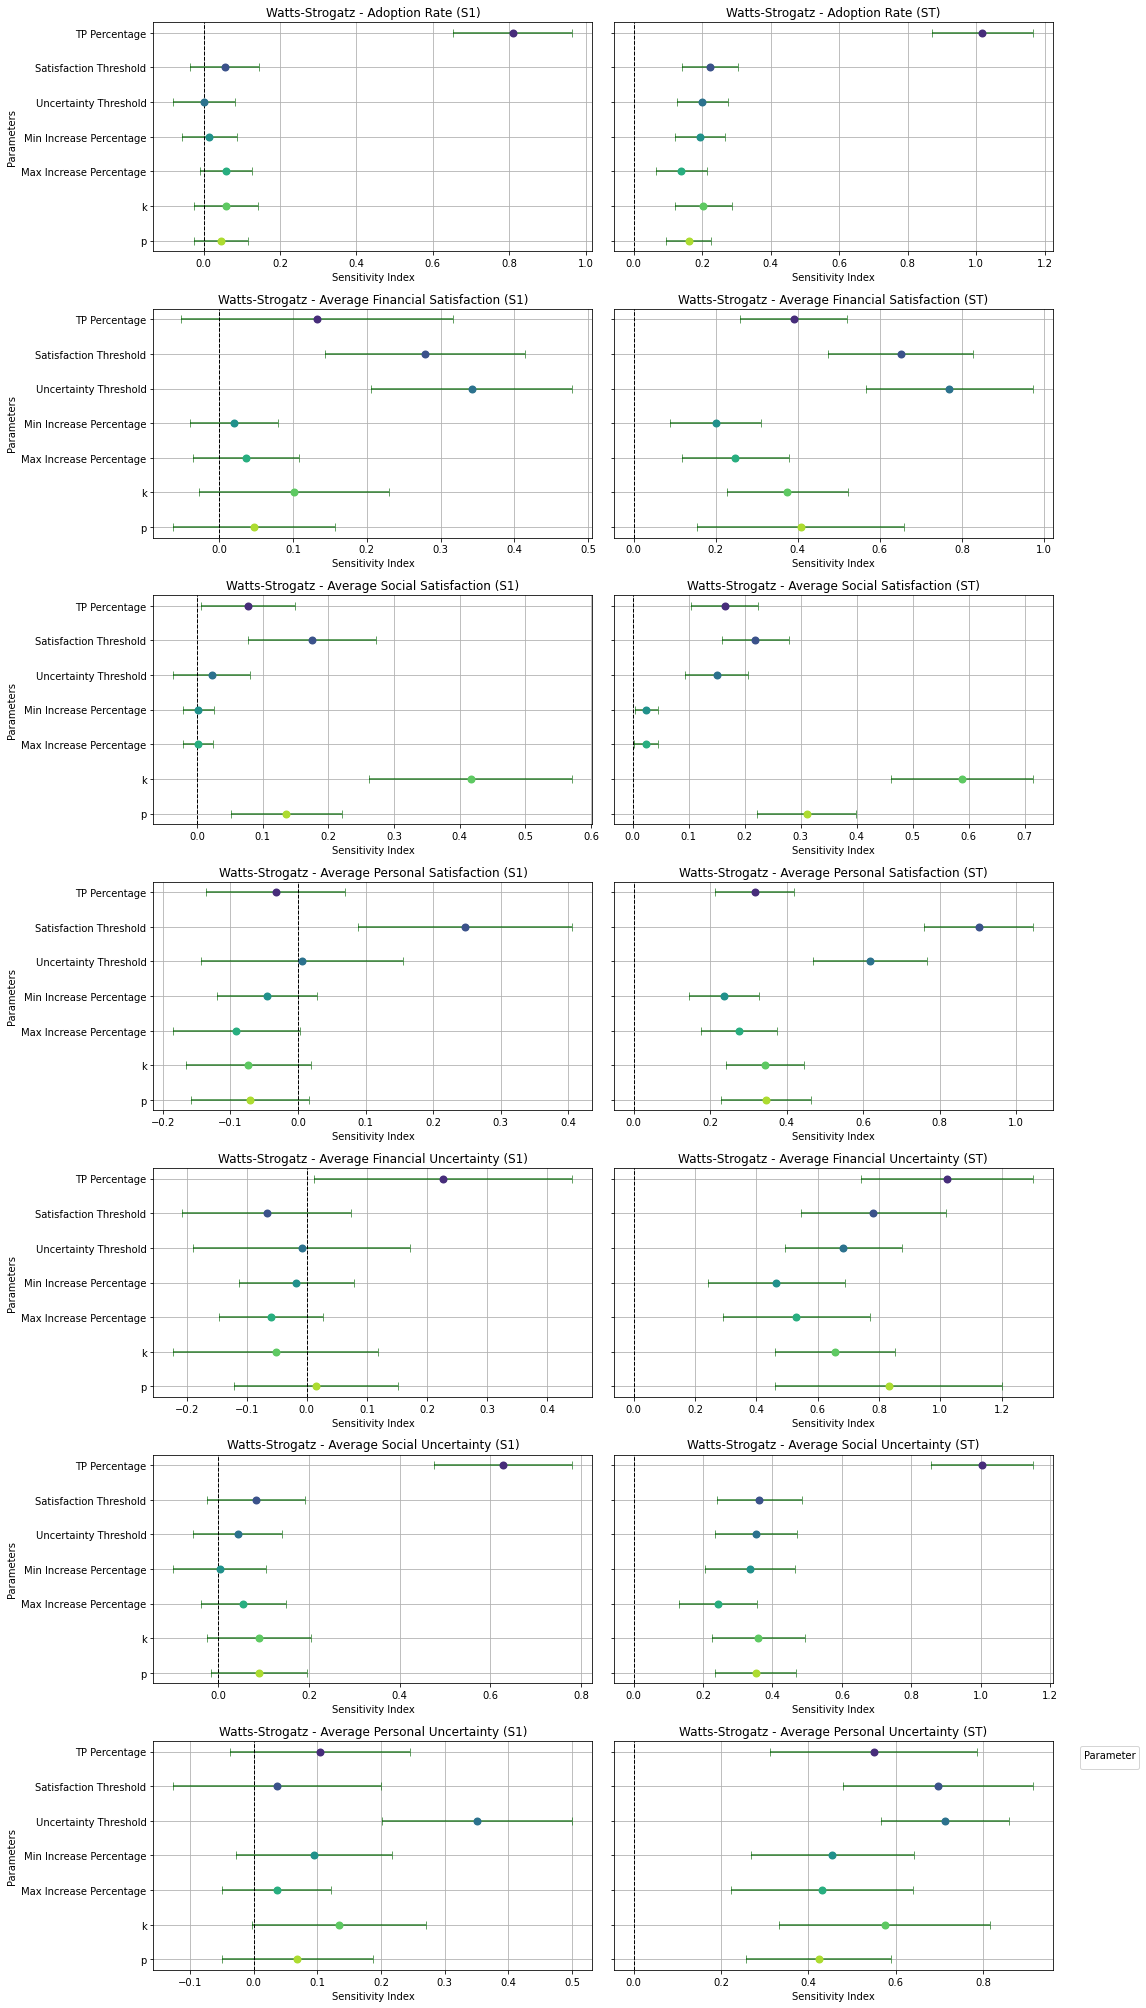

In [93]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

network_problems = {
    'Watts-Strogatz': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],  [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Random Regular': {
        'num_vars': 6,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}
sources_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}
# File paths for JSON files
json_file_paths = {
    "Barabasi-Albert": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Barabasi-Albert.json",
    "Holme-Kim": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Holme-Kim.json",
    "Random Regular": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Random Regular.json",
    "Watts-Strogatz": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/No homophily results/nohomphily_new_sensitivity_results_Watts-Strogatz.json"
}

# Load the JSON data into DataFrames
network_data_frames = {}
for network, file_path in json_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(sources_names)  # Apply source names mapping
        network_data_frames[network] = combined_df

# Display the DataFrames to verify structure
for network, df in network_data_frames.items():
    print(f"Data for {network}:")
    print(df.head(20))

# Function to plot Sensitivity Analysis for a given statistic (S1 or ST) and save without titles
def plot_sensitivity_by_measure(df, network):
    measures = df['Measure'].unique()
    fig, axes = plt.subplots(nrows=len(measures), ncols=2, figsize=(16, len(measures) * 4), sharey=True)
    for i, measure in enumerate(measures):
        for j, statistic in enumerate(['S1', 'ST']):
            subset_df = df[(df['Measure'] == measure) & (df['Statistic'].str.startswith(statistic))]
            sns.stripplot(data=subset_df[subset_df['Statistic'] == statistic], 
                          x='Value', y='Parameter', hue='Parameter', palette='viridis', jitter=False, size=8, ax=axes[i, j])
            
            # Add error bars
            main_data = subset_df[subset_df['Statistic'] == statistic]
            conf_data = subset_df[subset_df['Statistic'] == f'{statistic}_conf']
            for idx, row in main_data.iterrows():
                axes[i, j].errorbar(x=row['Value'], y=row['Parameter'], 
                                    xerr=conf_data[conf_data['Parameter'] == row['Parameter']]['Value'].values, 
                                    fmt='o', color='darkgreen', elinewidth=2, capsize=4, alpha=0.6)
            
            axes[i, j].axvline(x=0, color='black', linestyle='--', linewidth=1)
            axes[i, j].set_xlabel('Sensitivity Index')
            axes[i, j].set_ylabel('Parameters')
            axes[i, j].set_title(f'{network} - {measure} ({statistic})')
            axes[i, j].grid(True)
    
    plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Generate and save plots for each network
for network, df in network_data_frames.items():
    melted_df = pd.melt(df, id_vars=['Parameter', 'Measure'], value_vars=['S1', 'S1_conf', 'ST', 'ST_conf'], 
                         var_name='Statistic', value_name='Value')
    print(f"Plotting for {network}:")
    plot_sensitivity_by_measure(melted_df, network)


## Dynamic Models
Watts-Strogatz, Barabasi-Alberts, Holme-Kim, Random Regular with social comparison based on budget, preference sustainability or preference conformity

In [217]:
dynamic_file_paths = {
    "Barabasi-Albert - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Barabasi-Albert.json",
    "Holme-Kim - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Holme-Kim.json",
    "Random Regular - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Random Regular.json",
    "Watts-Strogatz - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Watts-Strogatz.json",
    "Barabasi-Albert - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Barabasi-Albert.json",
    "Holme-Kim - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Holme-Kim.json",
    "Random Regular - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Random Regular.json",
    "Watts-Strogatz - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Watts-Strogatz.json",
    "Barabasi-Albert - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Barabasi-Albert.json",
    "Holme-Kim - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Holme-Kim.json",
    "Random Regular - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Random Regular.json",
    "Watts-Strogatz - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Watts-Strogatz.json" 
}

# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz - budget': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert - budget': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Random Regular - budget': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim - budget': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20],[2, 10], [0, 1]] 
    },
    'Watts-Strogatz - preference conformity': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert - preference conformity': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Random Regular - preference conformity': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim - preference conformity': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20],[2, 10], [0, 1]] 
    },
    'Watts-Strogatz - preference sustainability': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage','max_increase_percentage', 'k', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1]] 
    },
    'Barabasi-Albert - preference sustainability': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon','min_increase_percentage', 'max_increase_percentage', 'm'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Random Regular - preference sustainability': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','d'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10]]  
    },
    'Holme-Kim - preference sustainability': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage','max_increase_percentage','m', 'p'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20],[2, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "epsilon": "Epsilon",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

measure_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

network_data_frames = {}
for network, file_path in dynamic_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(measure_names)  # Apply source names mapping
        combined_df = combined_df.drop(columns=['S2'])
        network_data_frames[network] = combined_df

In [218]:
for network, df in network_data_frames.items():
    print(f"Data for {network}:")
    print(df.head(20))

Data for Barabasi-Albert - budget:
          S1        ST   S1_conf   ST_conf                Parameter  \
0   0.464923  0.670195  0.136268  0.128030            TP Percentage   
1   0.006010  0.158347  0.071052  0.065820   Satisfaction Threshold   
2   0.065387  0.330092  0.110390  0.103071    Uncertainty Threshold   
3  -0.008193  0.056167  0.042174  0.047936                  Epsilon   
4  -0.000287  0.000095  0.001648  0.000080  Min Increase Percentage   
5  -0.000241  0.001288  0.006218  0.002181  Max Increase Percentage   
6  -0.023210  0.186440  0.080196  0.069825                        m   
7   0.013298  0.098769  0.044492  0.052471            TP Percentage   
8   0.240725  0.446858  0.104374  0.112937   Satisfaction Threshold   
9   0.541691  0.738984  0.135756  0.152671    Uncertainty Threshold   
10 -0.013825  0.076905  0.044613  0.060521                  Epsilon   
11 -0.000129  0.002797  0.010612  0.002292  Min Increase Percentage   
12 -0.031802  0.035991  0.025937  0.033873

In [219]:
combined_network_df = pd.concat(network_data_frames.values(), ignore_index=True)
print(combined_network_df.head())


         S1        ST   S1_conf   ST_conf                Parameter  \
0  0.464923  0.670195  0.136268  0.128030            TP Percentage   
1  0.006010  0.158347  0.071052  0.065820   Satisfaction Threshold   
2  0.065387  0.330092  0.110390  0.103071    Uncertainty Threshold   
3 -0.008193  0.056167  0.042174  0.047936                  Epsilon   
4 -0.000287  0.000095  0.001648  0.000080  Min Increase Percentage   

         Measure                   Network  
0  Adoption Rate  Barabasi-Albert - budget  
1  Adoption Rate  Barabasi-Albert - budget  
2  Adoption Rate  Barabasi-Albert - budget  
3  Adoption Rate  Barabasi-Albert - budget  
4  Adoption Rate  Barabasi-Albert - budget  


In [220]:
for network, df in network_data_frames.items():
    network_data_frames[network] = df.sort_values(by=['Measure', 'ST'], ascending=[True, False])

combined_network_df = pd.concat(network_data_frames.values(), ignore_index=True)
print(combined_network_df.head())


         S1        ST   S1_conf   ST_conf               Parameter  \
0  0.464923  0.670195  0.136268  0.128030           TP Percentage   
1  0.065387  0.330092  0.110390  0.103071   Uncertainty Threshold   
2 -0.023210  0.186440  0.080196  0.069825                       m   
3  0.006010  0.158347  0.071052  0.065820  Satisfaction Threshold   
4 -0.008193  0.056167  0.042174  0.047936                 Epsilon   

         Measure                   Network  
0  Adoption Rate  Barabasi-Albert - budget  
1  Adoption Rate  Barabasi-Albert - budget  
2  Adoption Rate  Barabasi-Albert - budget  
3  Adoption Rate  Barabasi-Albert - budget  
4  Adoption Rate  Barabasi-Albert - budget  


In [221]:
combined_network_df.to_excel('dynamic_combined_network_data.xlsx', index=False)


In [222]:

# Pivot the DataFrame to get the desired format
pivot_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='ST')

# Rename columns to include 'ST - ' prefix
pivot_df.columns = [f'ST - {col}' for col in pivot_df.columns]

# Reset the index to make 'Measure' and 'Parameter' columns again
pivot_df.reset_index(inplace=True)

# Save to Excel
pivot_df.to_excel('dynamic_network_pivot.xlsx', index=False)



In [223]:
print(pivot_df.head(20))

                           Measure                Parameter  \
0                    Adoption Rate                  Epsilon   
1                    Adoption Rate  Max Increase Percentage   
2                    Adoption Rate  Min Increase Percentage   
3                    Adoption Rate   Satisfaction Threshold   
4                    Adoption Rate            TP Percentage   
5                    Adoption Rate    Uncertainty Threshold   
6                    Adoption Rate                        d   
7                    Adoption Rate                        k   
8                    Adoption Rate                        m   
9                    Adoption Rate                        p   
10  Average Financial Satisfaction                  Epsilon   
11  Average Financial Satisfaction  Max Increase Percentage   
12  Average Financial Satisfaction  Min Increase Percentage   
13  Average Financial Satisfaction   Satisfaction Threshold   
14  Average Financial Satisfaction            TP Percen

In [224]:

# Pivot the DataFrame to get the desired format
pivot_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='S1')

# Rename columns to include 'ST - ' prefix
pivot_df.columns = [f'S1 - {col}' for col in pivot_df.columns]

# Reset the index to make 'Measure' and 'Parameter' columns again
pivot_df.reset_index(inplace=True)

# Save to Excel
pivot_df.to_excel('dynamic_network_pivot_S1.xlsx', index=False)

In [225]:

#Pivot the DataFrame to get the desired format for S1
pivot_s1_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='S1')
pivot_s1_df.columns = [f'S1 - {col}' for col in pivot_s1_df.columns]
pivot_s1_df.reset_index(inplace=True)

# Pivot the DataFrame to get the desired format for ST
pivot_st_df = combined_network_df.pivot_table(index=['Measure', 'Parameter'], columns='Network', values='ST')
pivot_st_df.columns = [f'ST - {col}' for col in pivot_st_df.columns]
pivot_st_df.reset_index(inplace=True)

# Merge the two pivot tables
pivot_df = pd.merge(pivot_s1_df, pivot_st_df, on=['Measure', 'Parameter'])

# Save to Excel
file_path = 'dynamic_network_pivot_full.xlsx'
pivot_df.to_excel(file_path, index=False)

# Adjust the column width using openpyxl
wb = load_workbook(file_path)
ws = wb.active

# Set the width of the first column (Measure) and second column (Parameter)
ws.column_dimensions['A'].width = 20
ws.column_dimensions['B'].width = 30

# Save the workbook with adjusted column widths
wb.save(file_path)

# Display the combined DataFrame to verify structure
print("Pivoted Data for All Dynamic Networks:")
print(pivot_df.head())

Pivoted Data for All Dynamic Networks:
         Measure                Parameter  S1 - Barabasi-Albert - budget  \
0  Adoption Rate                  Epsilon                      -0.008193   
1  Adoption Rate  Max Increase Percentage                      -0.000241   
2  Adoption Rate  Min Increase Percentage                      -0.000287   
3  Adoption Rate   Satisfaction Threshold                       0.006010   
4  Adoption Rate            TP Percentage                       0.464923   

   S1 - Barabasi-Albert - preference conformity  \
0                                     -0.004691   
1                                     -0.002338   
2                                     -0.000785   
3                                      0.027533   
4                                      0.538057   

   S1 - Barabasi-Albert - preference sustainability  S1 - Holme-Kim - budget  \
0                                         -0.049696                 0.003711   
1                                    

### Homophily

In [ ]:
dynamic_file_paths = {
    "Barabasi-Albert - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Barabasi-Albert.json",
    "Holme-Kim - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Holme-Kim.json",
    "Random Regular - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Random Regular.json",
    "Watts-Strogatz - budget": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_budget_Watts-Strogatz.json",
    "Barabasi-Albert - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Barabasi-Albert.json",
    "Holme-Kim - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Holme-Kim.json",
    "Random Regular - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Random Regular.json",
    "Watts-Strogatz - preference conformity": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferenceconformity_Watts-Strogatz.json",
    "Barabasi-Albert - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Barabasi-Albert.json",
    "Holme-Kim - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Holme-Kim.json",
    "Random Regular - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Random Regular.json",
    "Watts-Strogatz - preference sustainability": "/Applications/UNI/ThesisNew/Networks/No homophily/New data/Dynamic Results/dynamic_sensitivity_results_preferencesustainability_Watts-Strogatz.json" 
}

# Define the model inputs for each network type
network_problems = {
    'Watts-Strogatz - budget': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1], [0, 10], [0, 1]]
    },
    'Barabasi-Albert - budget': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'm', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]]  
    },
    'Random Regular - budget': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'd', 'alpha', 'beta'],
        'bounds':  [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]] 
    },
    'Holme-Kim - budget': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20], [2, 10], [0, 1],[0, 10], [0, 1]]
    },
    'Watts-Strogatz - preference conformity': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1], [0, 10], [0, 1]]
    },
    'Barabasi-Albert - preference conformity': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'm', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]] 
    },
    'Random Regular - preference conformity': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'd', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]] 
    },
    'Holme-Kim - preference conformity': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20], [2, 10], [0, 1],[0, 10], [0, 1]]
    },
    'Watts-Strogatz - preference sustainability': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon', 'min_increase_percentage', 'max_increase_percentage', 'k', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1], [1,10], [11,20], [2, 10], [0, 1], [0, 10], [0, 1]]
    },
    'Barabasi-Albert - preference sustainability': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'm', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]] 
    },
    'Random Regular - preference sustainability': {
        'num_vars': 7,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold', 'epsilon','min_increase_percentage', 'max_increase_percentage', 'd', 'alpha', 'beta'],
        'bounds':  [[0, 1], [0, 1], [0, 1], [0,1],[1,10], [11,20],[2, 10], [0, 10], [0, 1]]
    },
    'Holme-Kim - preference sustainability': {
        'num_vars': 8,
        'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold','epsilon', 'min_increase_percentage', 'max_increase_percentage', 'm', 'p', 'alpha', 'beta'],
        'bounds': [[0, 1], [0, 1], [0, 1],[0,1], [1,10], [11,20], [2, 10], [0, 1],[0, 10], [0, 1]] 
    }
}

parameter_names = {
    "TP_percentage": "TP Percentage",
    "satisfaction_threshold": "Satisfaction Threshold",
    "uncertainty_threshold": "Uncertainty Threshold",
    "min_increase_percentage": "Min Increase Percentage",
    "max_increase_percentage": "Max Increase Percentage",
    "epsilon": "Epsilon",
    "alpha": "alpha",
    "beta": "beta",
    "k": "k",
    "p": "p",
    "m": "m",
    "d": "d"
}

measure_names = {
    "Adoption Rate": "Adoption Rate",
    "Avg_F_Satisfaction": "Average Financial Satisfaction",
    "Avg_F_Uncertainty": "Average Financial Uncertainty",
    "Avg_P_Satisfaction": "Average Personal Satisfaction",
    "Avg_P_Uncertainty": "Average Personal Uncertainty",
    "Avg_S_Satisfaction": "Average Social Satisfaction",
    "Avg_S_Uncertainty": "Average Social Uncertainty"
}

network_data_frames = {}
for network, file_path in dynamic_file_paths.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        frames = []
        for measure, values in data.items():
            df = pd.DataFrame(values)
            df['Parameter'] = df.index
            df['Measure'] = measure
            df['Network'] = network
            frames.append(df)
        combined_df = pd.concat(frames, ignore_index=True)
        combined_df['Parameter'] = combined_df['Parameter'].map(dict(enumerate(network_problems[network]['names'])))
        combined_df['Parameter'] = combined_df['Parameter'].map(parameter_names)  # Apply parameter names mapping
        combined_df['Measure'] = combined_df['Measure'].map(measure_names)  # Apply source names mapping
        combined_df = combined_df.drop(columns=['S2'])
        network_data_frames[network] = combined_df